# US Accidents

## About Dataset

Description

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records. 

## Inspiration

The US-Accidents dataset can be used for numerous applications, such as real-time car accident prediction, studying car accident hotspot locations, casualty analysis, extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence. The most recent release of the dataset can also be useful for studying the impact of COVID-19 on traffic behavior and accidents.

In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
evaluate 0.4.1 requires tqdm>=4.62.1, but you have tqdm 4.56.0 which is incompatible.
datasets 2.15.0 requires tqdm>=4.62.1, but you have tqdm 4.56.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anushka
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


  0%|                                                                                       | 0.00/653M [00:00<?, ?B/s]

100%|███████████████████████████████████████████████████████████████████████████████| 653M/653M [03:04<00:00, 3.71MB/s]


In [3]:
data_filename = './us-accidents/US_Accidents_March23.csv'

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(data_filename)

In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


### Number of Numerical data columns

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

### Missing Values Percentage per column

In [9]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [10]:
type(missing_percentages)

pandas.core.series.Series

In [11]:
print(missing_percentages[missing_percentages != 0])

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64


<AxesSubplot:>

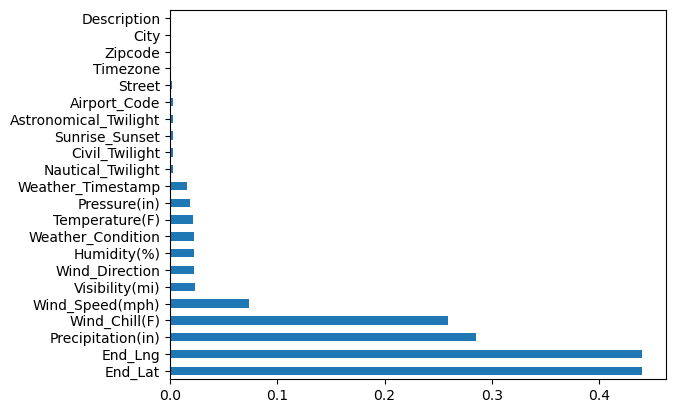

In [12]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

As We can see in the above plot features like End_Lat, End_Lng have high missing values. Therefore we have to handle these missing values

## Handling Missing Values

In [13]:
columns_with_missing_values=['End_Lat','End_Lng','Precipitation(in)','Wind_Chill(F)','Wind_Speed(mph)','Visibility(mi)','Wind_Direction','Humidity(%)','Weather_Condition',        
                             'Temperature(F)','Pressure(in)','Weather_Timestamp','Nautical_Twilight','Civil_Twilight','Sunrise_Sunset','Astronomical_Twilight','Airport_Code','Street',                   
                             'Timezone','Zipcode','City','Description']

In [14]:
# Fill missing values for numeric columns with median  
for column in columns_with_missing_values:  
    if df[column].dtype in ['int64', 'float64']:  
        df[column].fillna(df[column].median(), inplace=True)  
    elif df[column].dtype == 'object':  
        # You can choose one of the methods below to fill missing values for object type columns:  

        # Example 1: Fill with a specific value  
        # df[column].fillna('Unknown', inplace=True)  

        # Example 2: Fill with the most frequent value  
        df[column].fillna(df[column].mode()[0], inplace=True)  

        # Example 3: Forward fill (use if appropriate)  
        # df[column].fillna(method='ffill', inplace=True)  

        # Example 4: Backward fill (use if appropriate)  
        # df[column].fillna(method='bfill', inplace=True)  
 

In [15]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

ID                       0.0
No_Exit                  0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Precipitation(in)        0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
Railway                  0.0
Source                   0.0
Roundabout               0.0
Station                  0.0
Stop                     0.0
Traffic_Calming          0.0
Traffic_Signal           0.0
Turning_Loop             0.0
Sunrise_Sunset           0.0
Civil_Twilight           0.0
Nautical_Twilight        0.0
Visibility(mi)           0.0
Pressure(in)             0.0
Humidity(%)              0.0
Wind_Chill(F)            0.0
Severity                 0.0
Start_Time               0.0
End_Time                 0.0
Start_Lat                0.0
Start_Lng                0.0
End_Lat                  0.0
End_Lng                  0.0
Distance(mi)             0.0
Description   

#### By implementing the above code it proves that the missing data has been handled effectively for both object and numeric data type.

## Exploratory Analysis and Visualization

### Columns we'll analyze:

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

In [16]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [17]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [18]:
cities = df.City.unique()
len(cities)

13678

In [19]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           187170
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

## Top 20 cities in terms of Number of Accidents

In [20]:
cities_by_accident[:20]

Miami            187170
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

In [21]:
type(cities_by_accident)

pandas.core.series.Series

<AxesSubplot:>

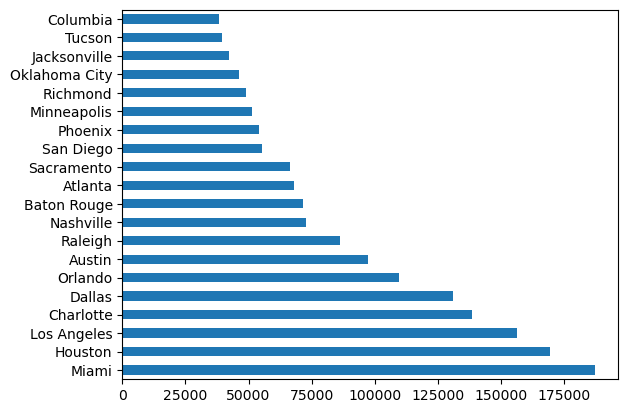

In [22]:
cities_by_accident[:20].plot(kind='barh')

## Cities with only one accident

In [23]:
cities_by_accident[cities_by_accident == 1]

Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1023, dtype: int64

##  Start Time

In [24]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [25]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [26]:
# Extract hour from Start_Time  
df['Hour'] = df['Start_Time'].dt.hour  

# Count occurrences for each hour  
hour_counts = df['Hour'].value_counts().sort_index()  

# Calculate percentage  
hour_percentage = (hour_counts / hour_counts.sum()) * 100  

print(hour_percentage)

0     1.454093
1     1.256031
2     1.206292
3     1.085128
4     2.068373
5     2.952515
6     5.251246
7     7.601476
8     7.473429
9     4.697405
10    4.434375
11    4.593969
12    4.593464
13    5.129720
14    5.807753
15    6.804195
16    7.530271
17    7.453230
18    5.590321
19    3.818659
20    2.914267
21    2.477255
22    2.169209
23    1.637326
Name: Hour, dtype: float64


### Highest Number of Accidents were seen in morning at 7 am in morning and then in even at about 4 to 5 pm

In [27]:
import seaborn as sns
sns.set_style("darkgrid")

C:\Users\91989\AppData\Local\Temp\ipykernel_17376\362819596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

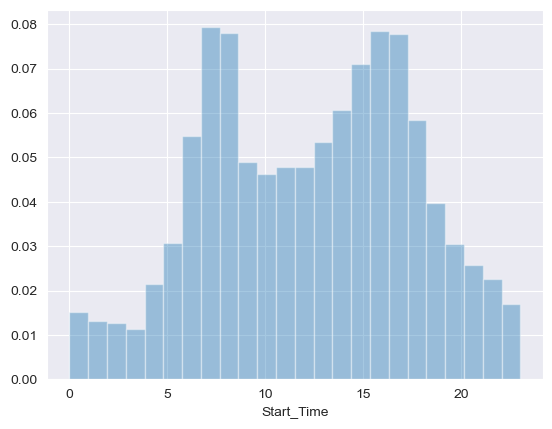

In [28]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

In [29]:
# Extract month from Start_Time  
df['Month'] = df['Start_Time'].dt.month_name()  

# Count occurrences for each month  
month_counts = df['Month'].value_counts()  

# Calculate percentage  
month_percentage = (month_counts / month_counts.sum()) * 100  

print(month_percentage)

December     10.964024
November      9.836002
January       9.729654
October       8.735709
February      8.526791
September     8.428413
August        7.759258
April         7.599250
June          7.393166
May           7.222406
March         7.176070
July          6.629256
Name: Month, dtype: float64


### Highest accidents is in the winters probably due to snow and less visibility

In [30]:
# Extract year from Start_Time  
df['Year'] = df['Start_Time'].dt.year  

# Count occurrences for each year  
year_counts = df['Year'].value_counts()  

# Calculate percentage  
year_percentage = (year_counts / year_counts.sum()) * 100  

print(year_percentage)

2022    22.804893
2021    20.233867
2020    15.254308
2019    12.348012
2018    11.560306
2017     9.291620
2016     5.315736
2023     3.191258
Name: Year, dtype: float64


### Highest number of Accidents in Year of 2022 and 2021

In [31]:
# Extract day of the week  
df['Day_of_Week'] = df['Start_Time'].dt.day_name()  

# Count occurrences for each day of the week  
day_counts = df['Day_of_Week'].value_counts()  

# Calculate percentage  
day_percentage = (day_counts / day_counts.sum()) * 100  

print(day_percentage)

Friday       17.681539
Thursday     17.031080
Wednesday    16.981394
Tuesday      16.703716
Monday       15.668469
Saturday      8.652289
Sunday        7.281513
Name: Day_of_Week, dtype: float64


C:\Users\91989\AppData\Local\Temp\ipykernel_17376\308908771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

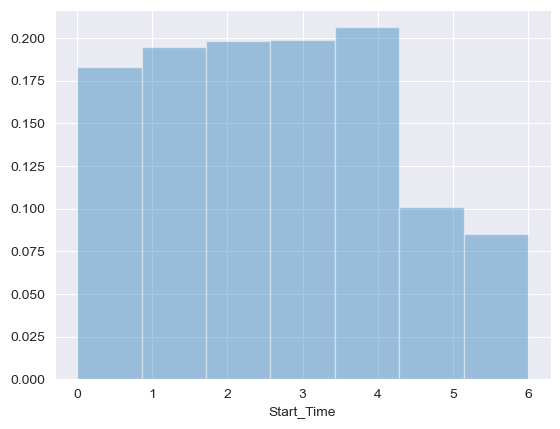

In [32]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

### Highest Number of ACCIDENTS on Friday and Thursday

#### Is the distribution of accidents by hour the same on weekends as on weekdays.

C:\Users\91989\AppData\Local\Temp\ipykernel_17376\3630331899.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

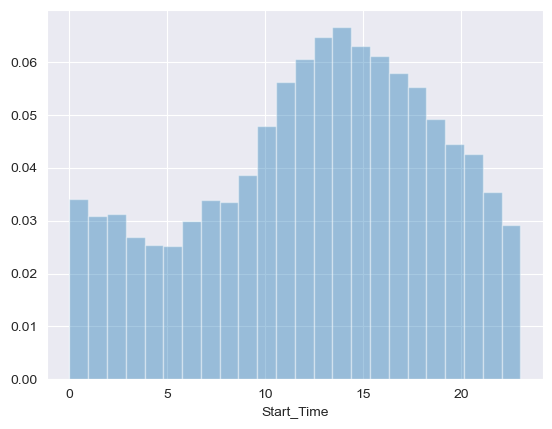

In [33]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

### This shows on sunday the distribution of number of accidents is more at the afternoon time which is quite opposite to the one seen on weedays

C:\Users\91989\AppData\Local\Temp\ipykernel_17376\3824518482.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(saturday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<AxesSubplot:xlabel='Start_Time'>

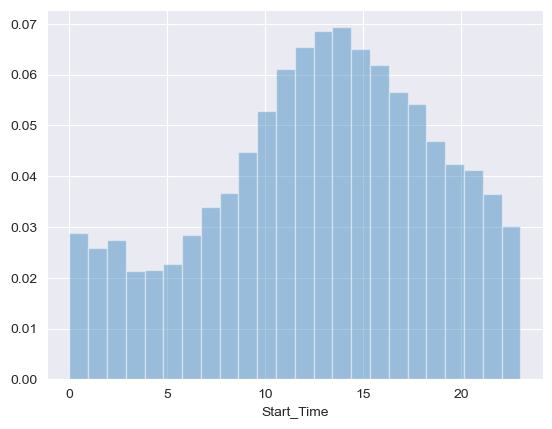

In [34]:
saturday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(saturday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

### similar trend is seen for saturday (just like sunday more accidents in the afternoon)

In [35]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [36]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [37]:
sample_df = df.sample(int(0.1 * len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

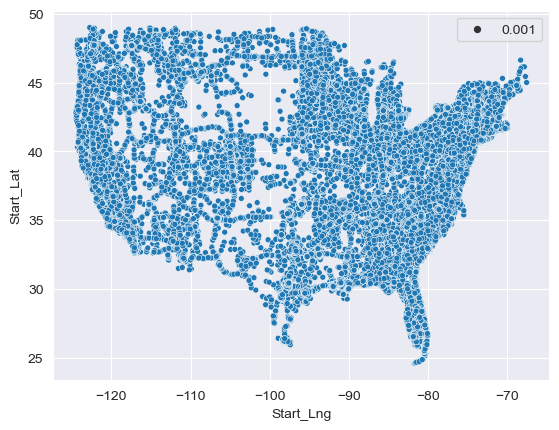

In [38]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

## Using Folium which is a Python library used for visualizing geospatial data

In [49]:
pip install folium

     -------------------------------------- 110.5/110.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 88.4/88.4 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 134.6/134.6 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.4 which is incompatible.
ydata-profiling 4.1.2 requires pydantic<1.11,>=1.8.1, but you have pydantic 2.5.2 which is incompatible.


In [39]:
import folium

In [40]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [41]:
from folium.plugins import HeatMap

In [42]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [43]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [58]:
import matplotlib.pyplot as plt

In [61]:
severity_counts = df['Severity'].value_counts().sort_index()
total_cases = df.shape[0]
severity_percentages = (severity_counts / total_cases) * 100

severity_df = pd.DataFrame({
    'Severity': severity_counts.index,
    'Counts': severity_counts.values,
    'Percentage': severity_percentages.values
})

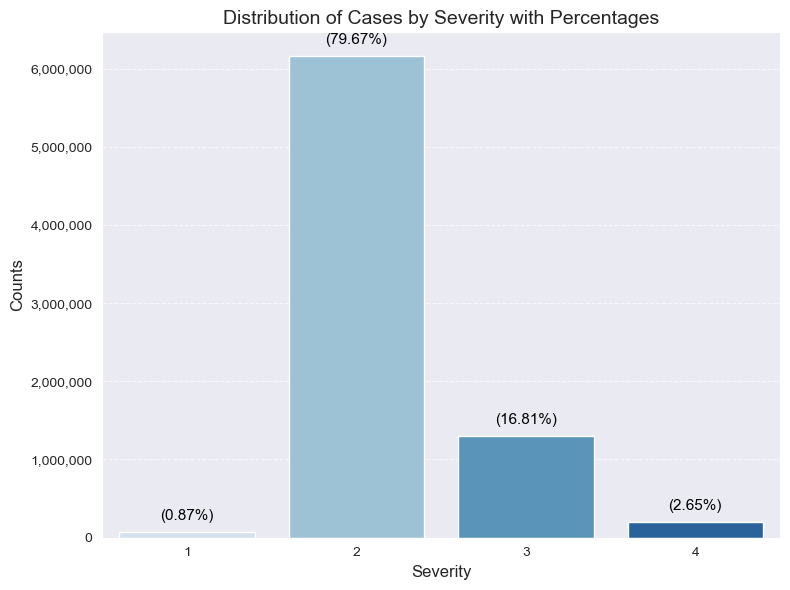

In [62]:
plt.figure(figsize=(8, 6))  
colors = sns.color_palette("Blues", n_colors=len(severity_df))  # Assign colors based on severity count  
sns.barplot(data=severity_df, x="Severity", y="Counts", palette=colors)  
for i, row in severity_df.iterrows():  
    plt.text(i, row['Counts'] + total_cases * 0.02,  # Adjusted position for text  
             f"({row['Percentage']:.2f}%)",   
             ha='center', fontsize=11, color='black')  

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))  
plt.title('Distribution of Cases by Severity with Percentages', fontsize=14)  
plt.xlabel('Severity', fontsize=12)  
plt.ylabel('Counts', fontsize=12)  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

#### Based on the above plot:

1. Severity 2 (almsot 80%) - most cases fall under this category means most cases are moderate in nature.
2. 17% cases fall under severity level 3 they are smaller percentage as comapred to severity 2 but still reflect a significant      number of serious inciddents.
3. less than 1% cases fall under the severity -1 means very few cases are there that are very mild in nature.
4. 65% of the cases are very critical in nature which are rare but still require significant attention and more insights can be    found with further analysis
5. The dataset maybe biased towards severity 2 but it is also possible that most cases fall under this category,and preventing      such cases is possible with improving safety plans and infrastrcuture. Severity 1 maybe rare and may not be reported as          often.

In [66]:
df.groupby(["City", "Severity"]).size()

City        Severity
Aaronsburg  2            19
            3             2
Abbeville   1             4
            2           589
            3             2
                       ... 
Zuni        2            52
            3             1
            4            15
Zwingle     2            10
            4             4
Length: 34311, dtype: int64

In [67]:
def plot_severity_distribution(data, group_by_column, figsize=(12, 8), top_n=None):
    
    # grouping the data by column
    grouped_data = data.groupby([group_by_column, 'Severity']).size().reset_index(name='Counts')
    
    # total number of cases for each group_by_column
    total_counts_per_group = grouped_data.groupby(group_by_column)['Counts'].transform('sum')
    
    # calculate percentage for each severity level
    grouped_data['Percentage'] = (grouped_data['Counts'] / total_counts_per_group) * 100
    
    # include only the top N groups based on total counts 
    if top_n:
        top_groups = grouped_data.groupby(group_by_column)['Counts'].sum().nlargest(top_n).index
        grouped_data = grouped_data[grouped_data[group_by_column].isin(top_groups)]

    # pivoting the data for plotting
    pivot_counts = grouped_data.pivot(index=group_by_column, columns='Severity', values='Counts').fillna(0)
    pivot_percentages = grouped_data.pivot(index=group_by_column, columns='Severity', values='Percentage').fillna(0)

    # sorting rows in descending order by the total number of cases
    pivot_counts['Total'] = pivot_counts.sum(axis=1)
    pivot_counts = pivot_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

    # plotting 
    ax = pivot_counts.plot(
        kind='bar', 
        stacked=True, 
        colormap='viridis', 
        figsize=figsize, 
        width=0.8
    )
    
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
    plt.title(f'Number of Cases by Severity and {group_by_column}', fontsize=16)
    plt.xlabel(group_by_column, fontsize=12)
    plt.ylabel('Number of Cases', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.legend(title='Severity Level', fontsize=10)
    plt.tight_layout()
    plt.show() 

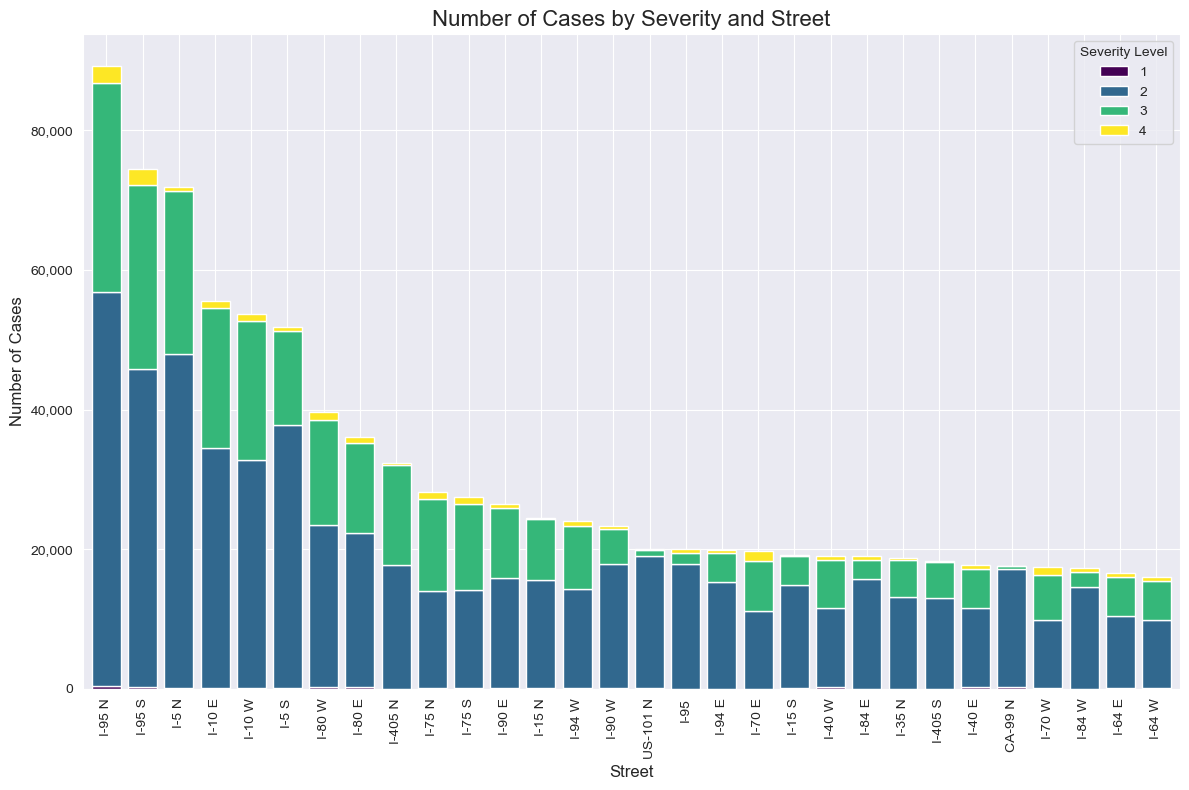

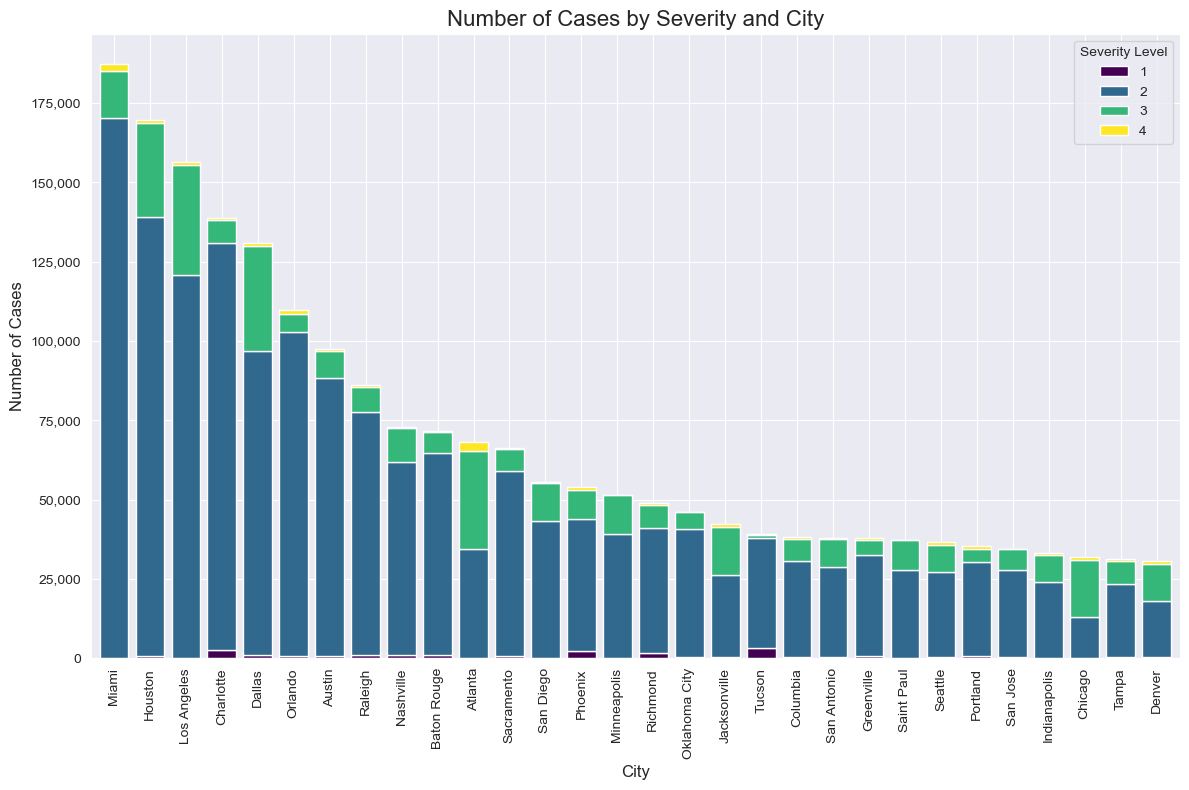

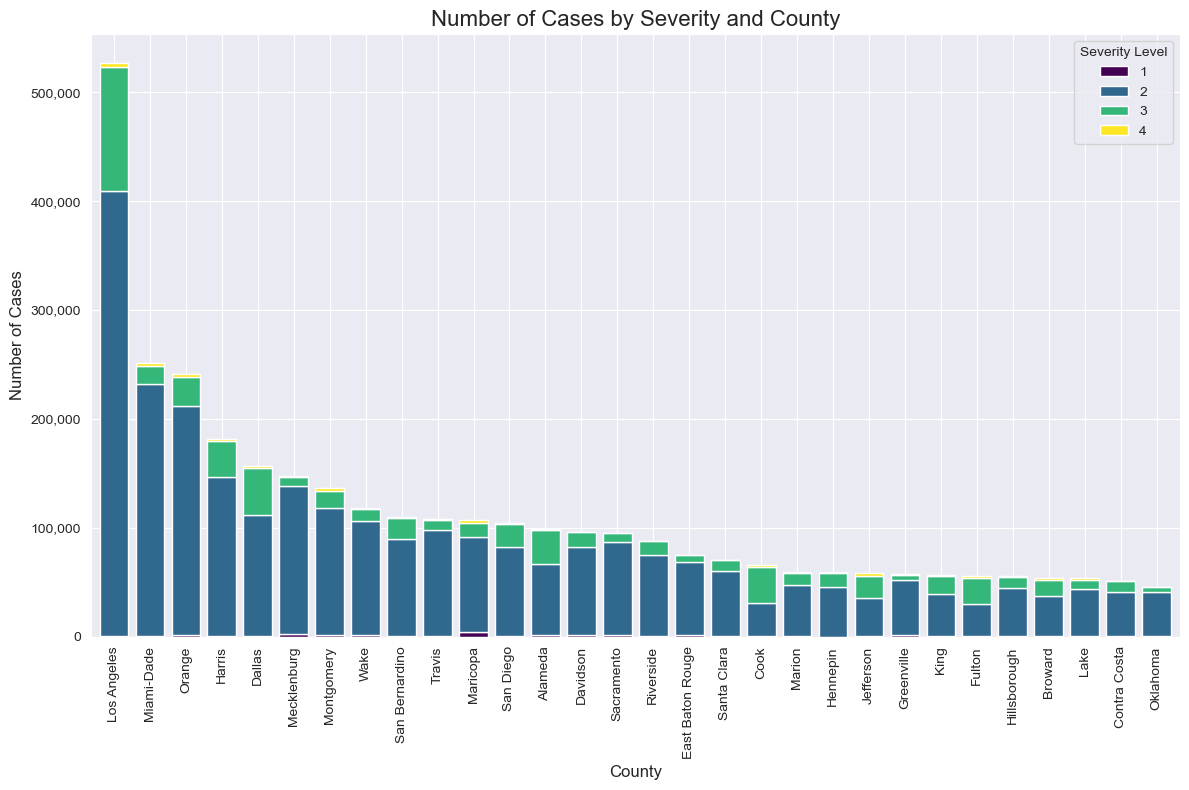

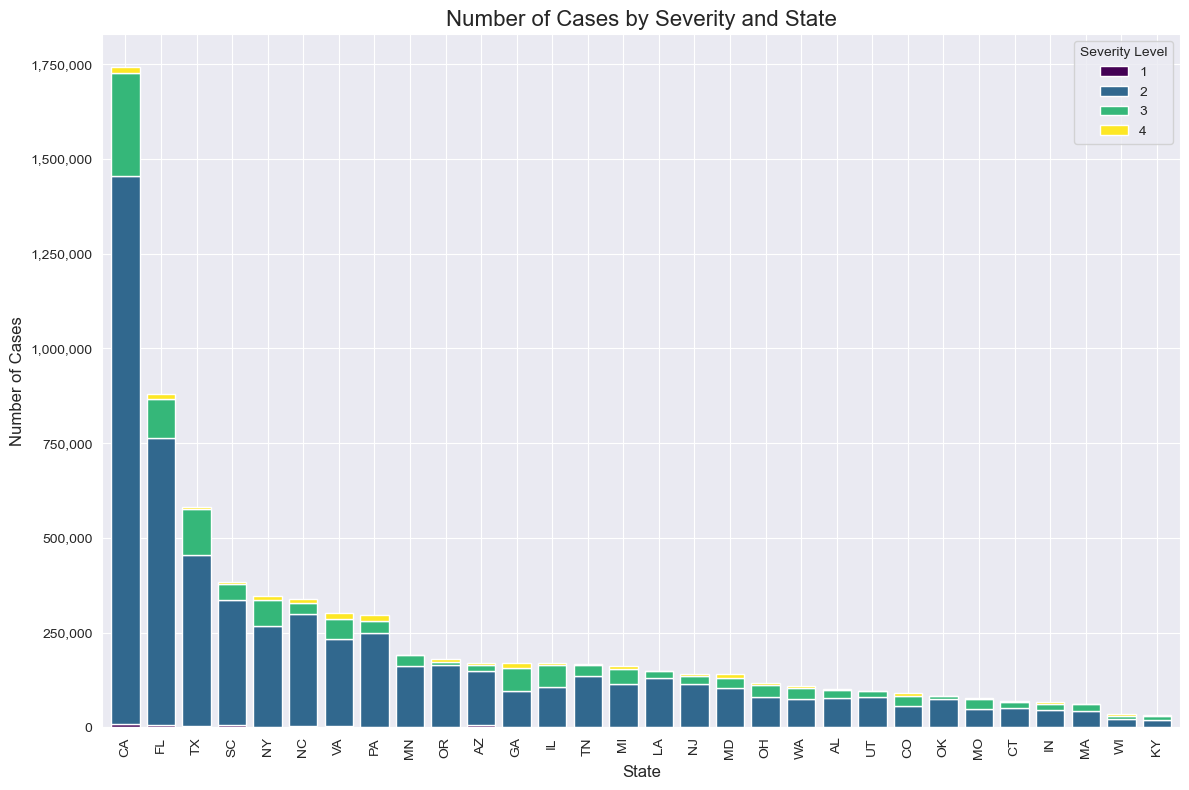

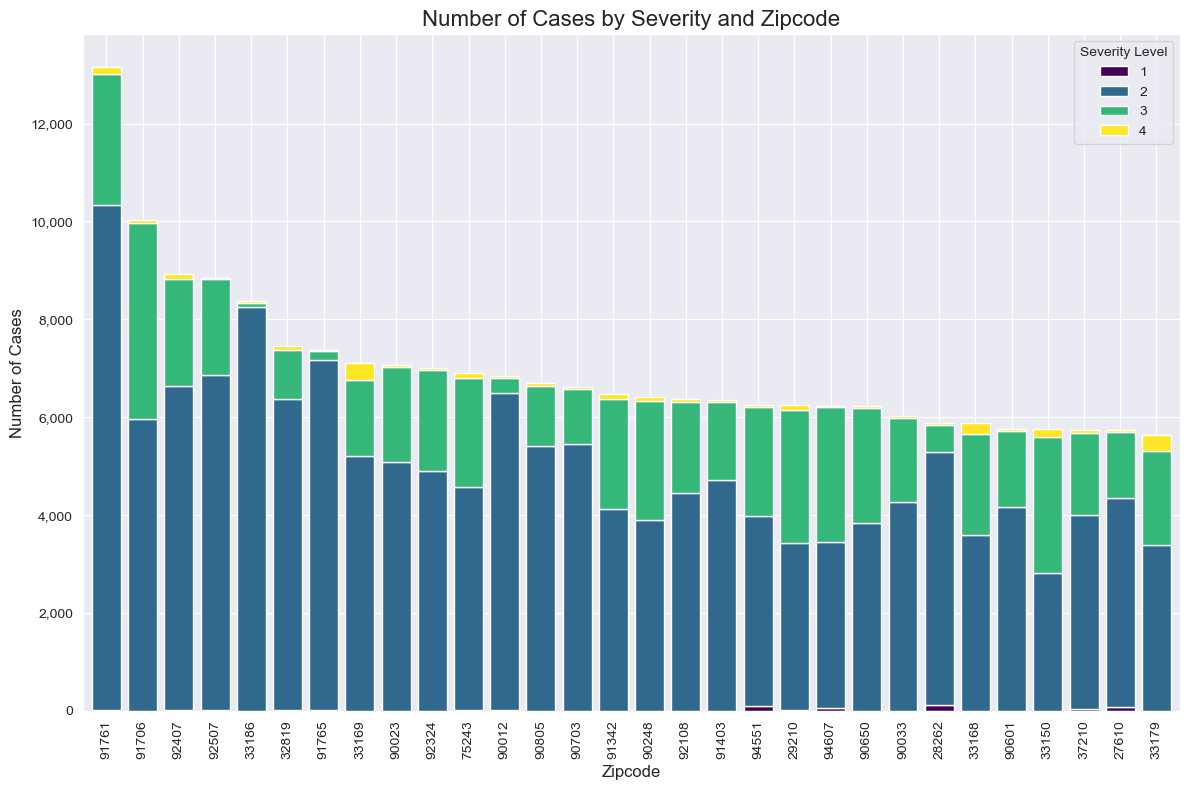

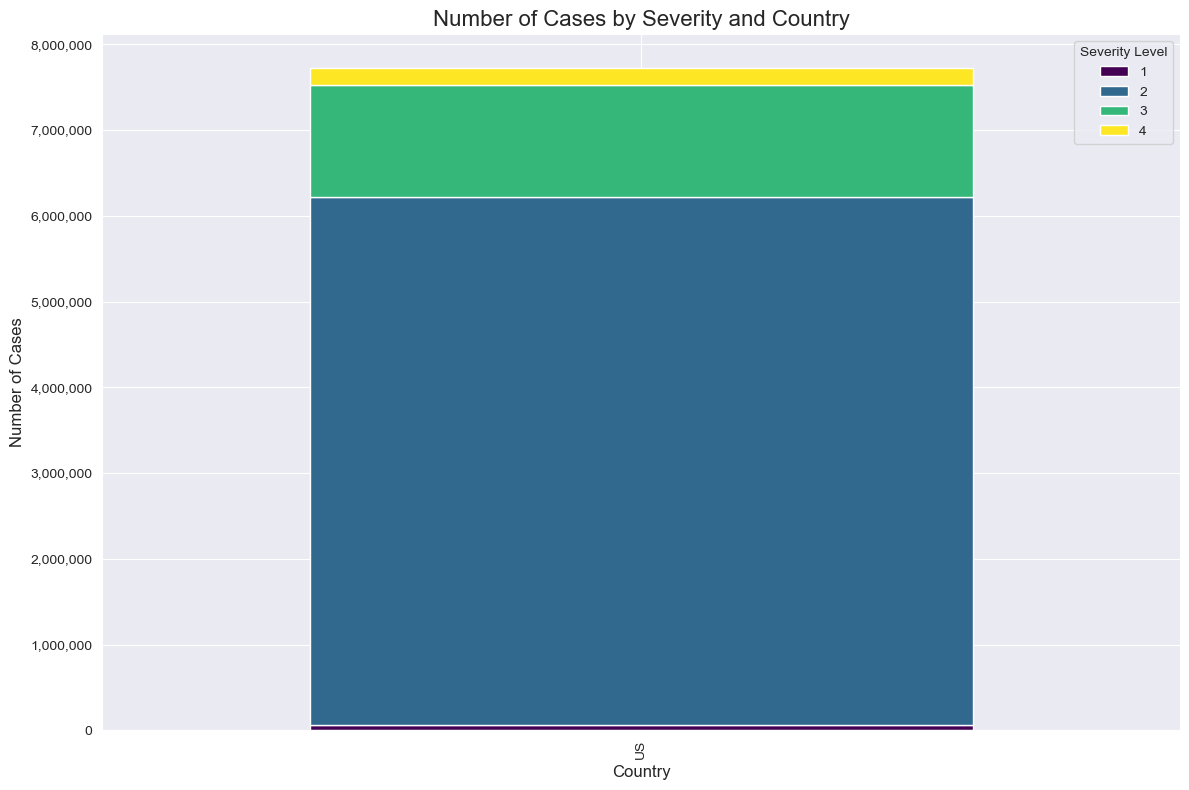

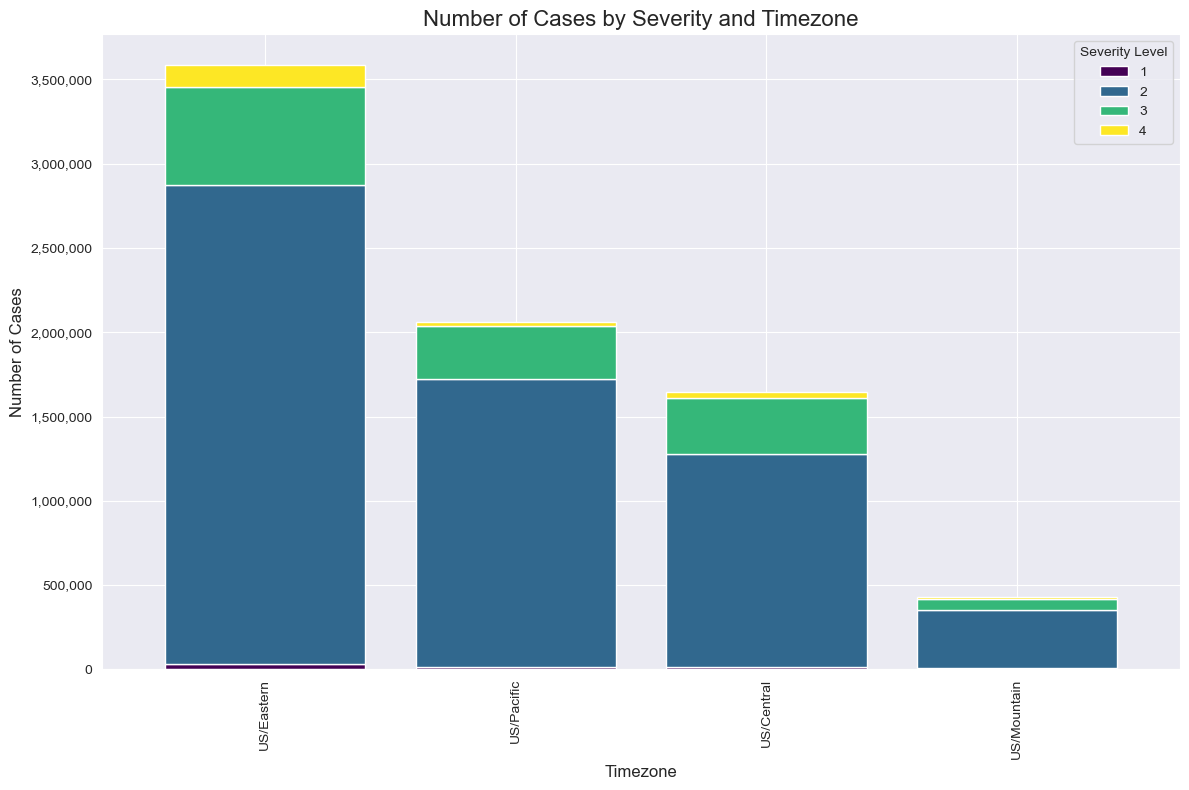

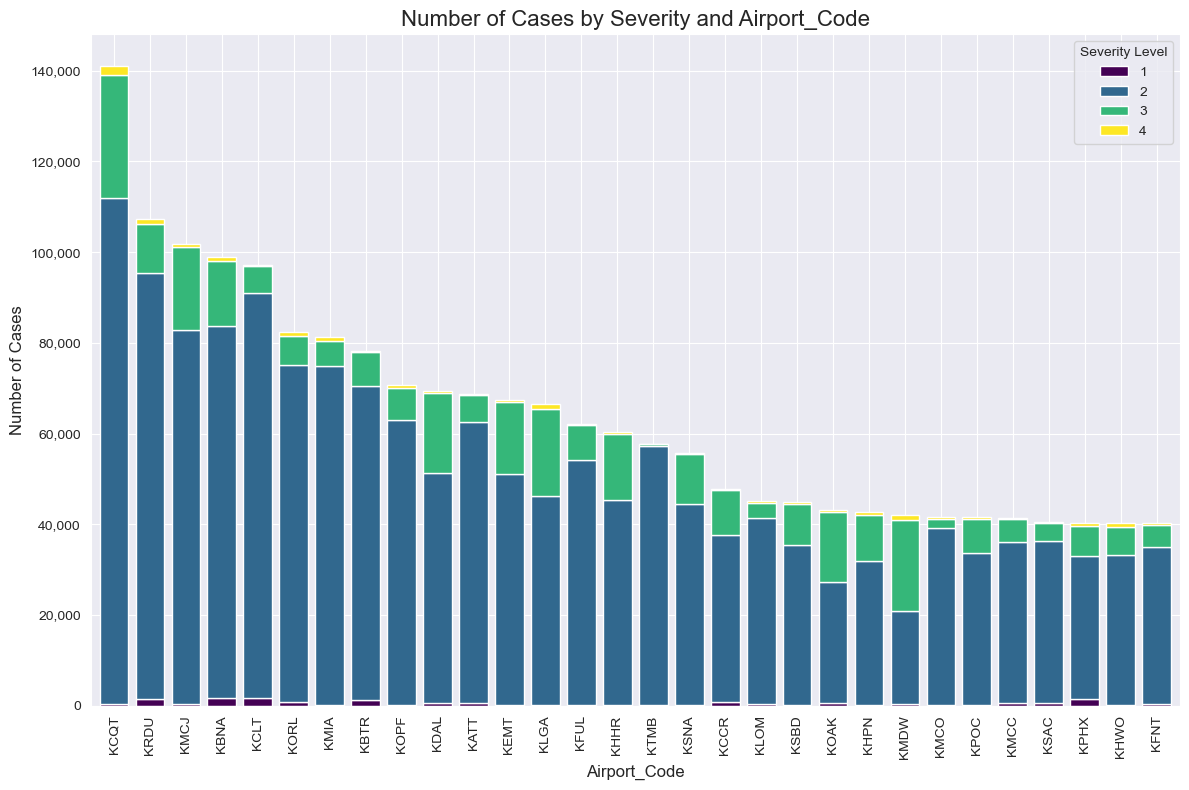

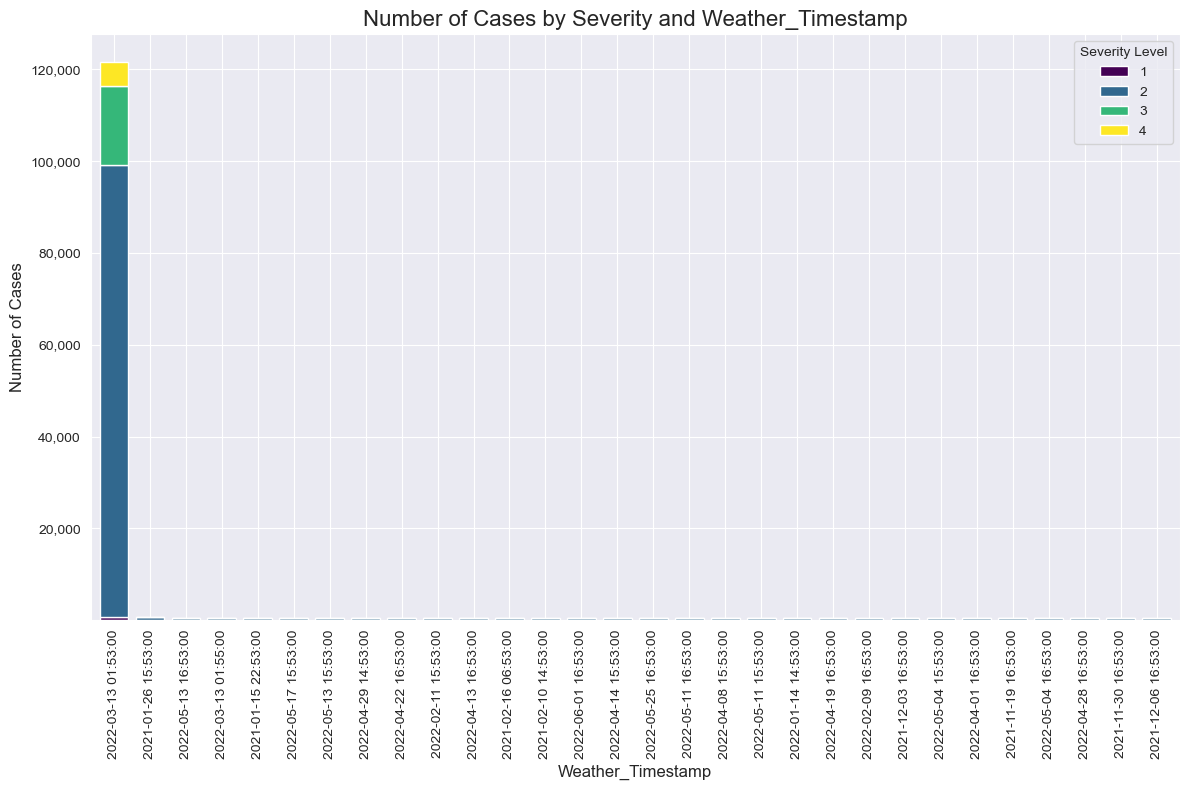

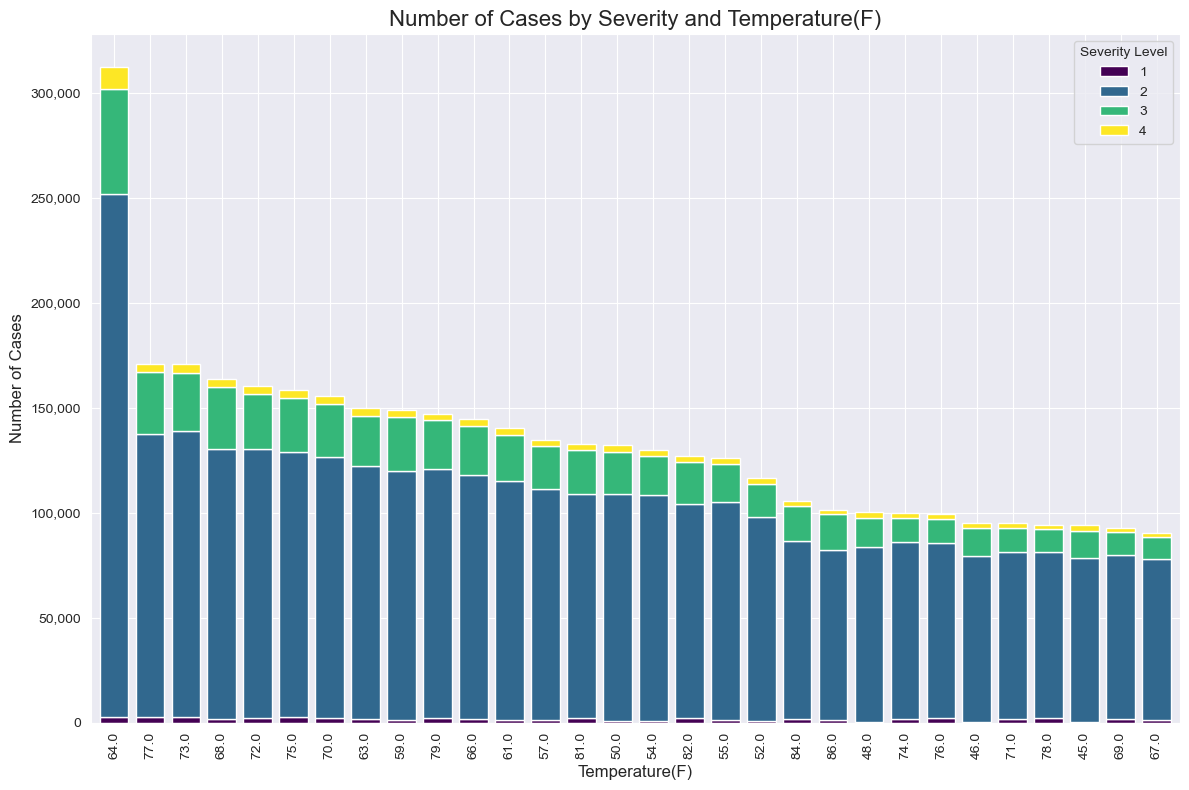

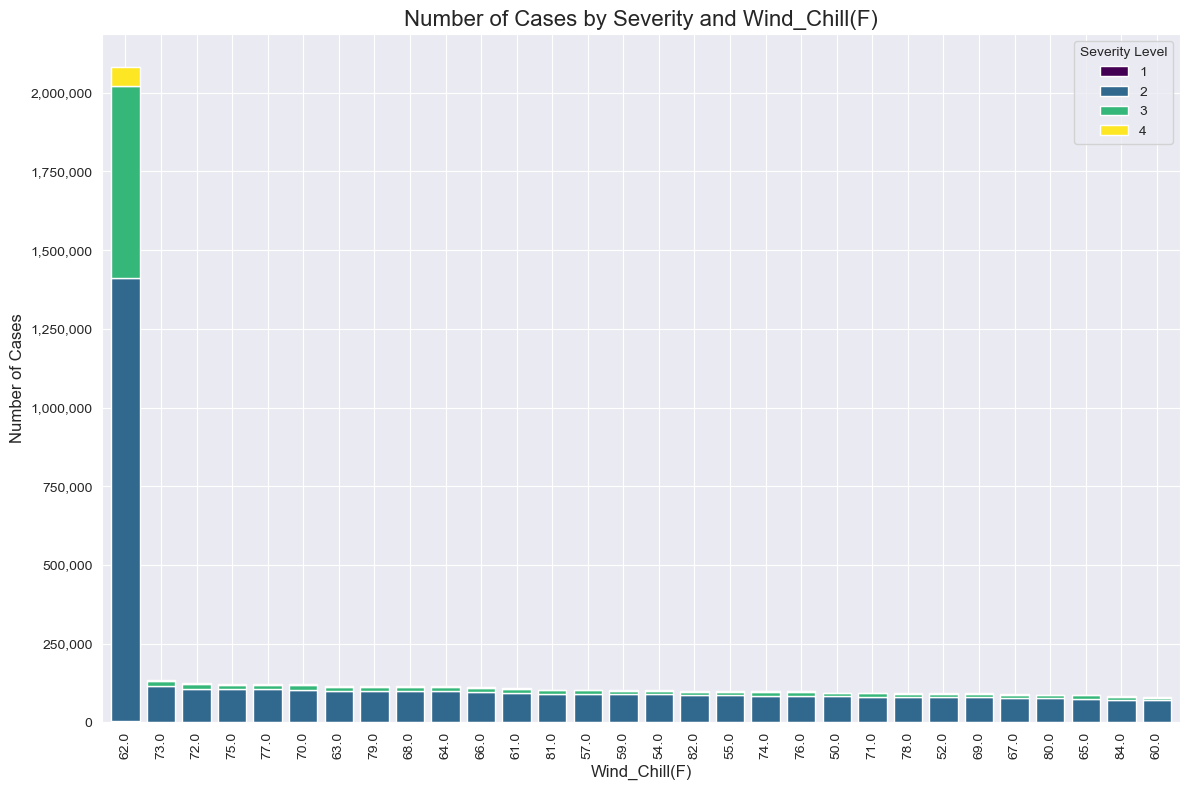

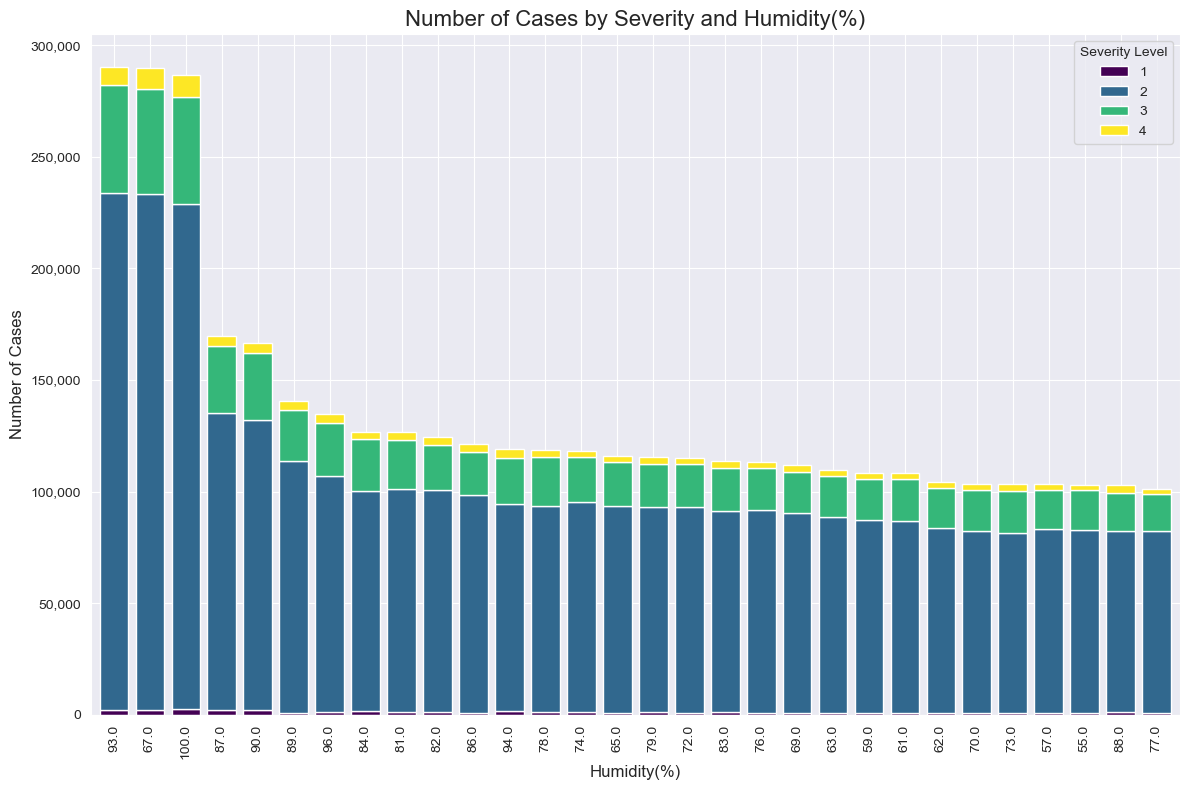

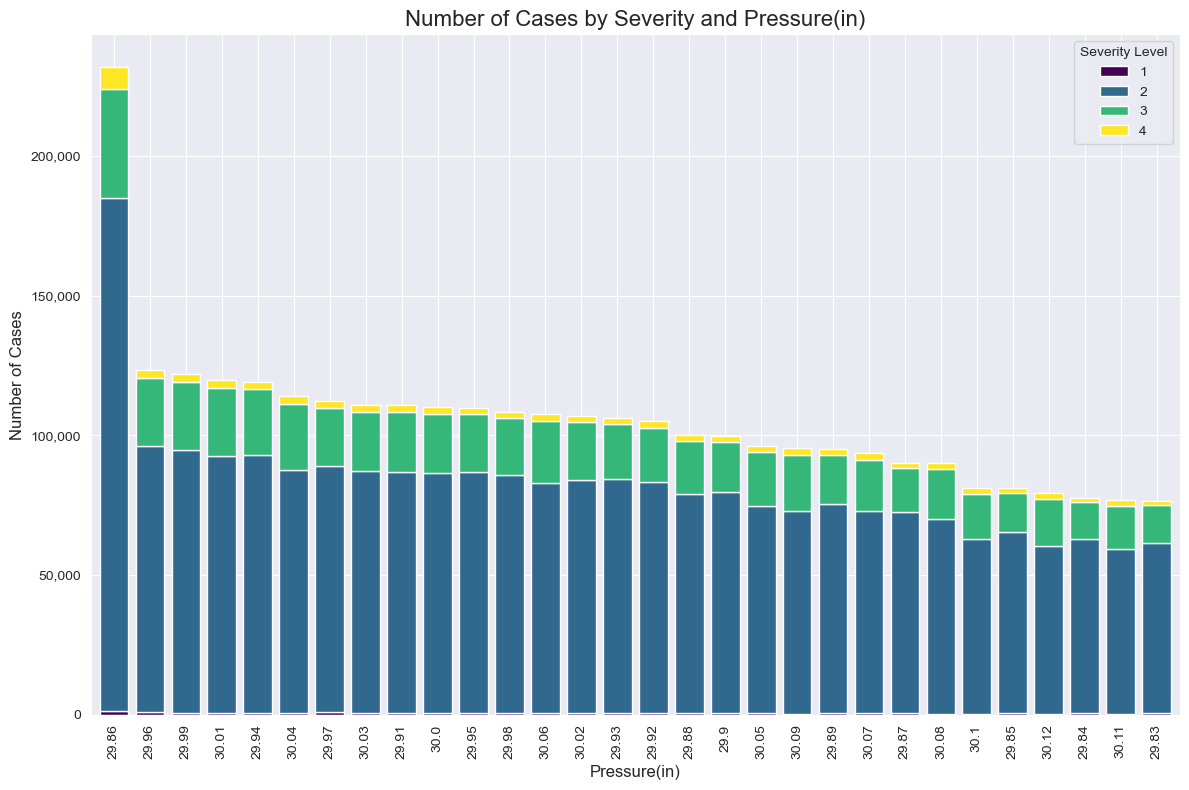

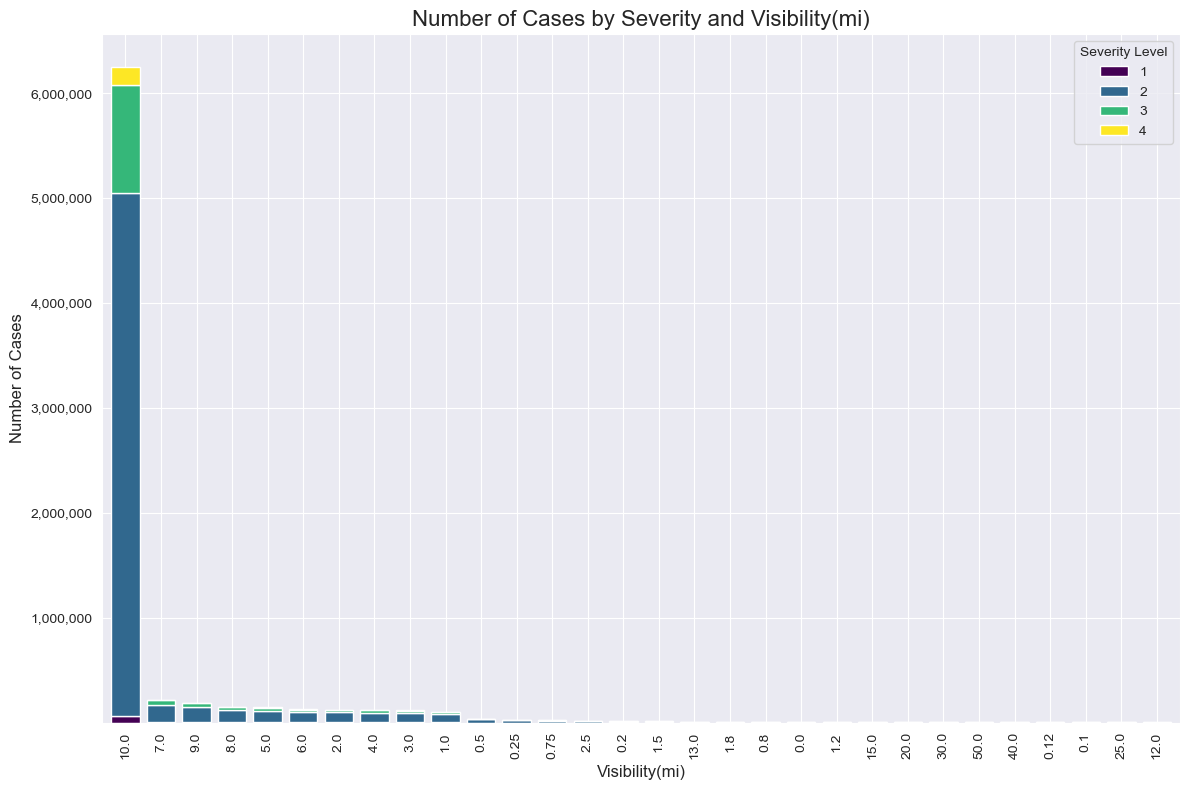

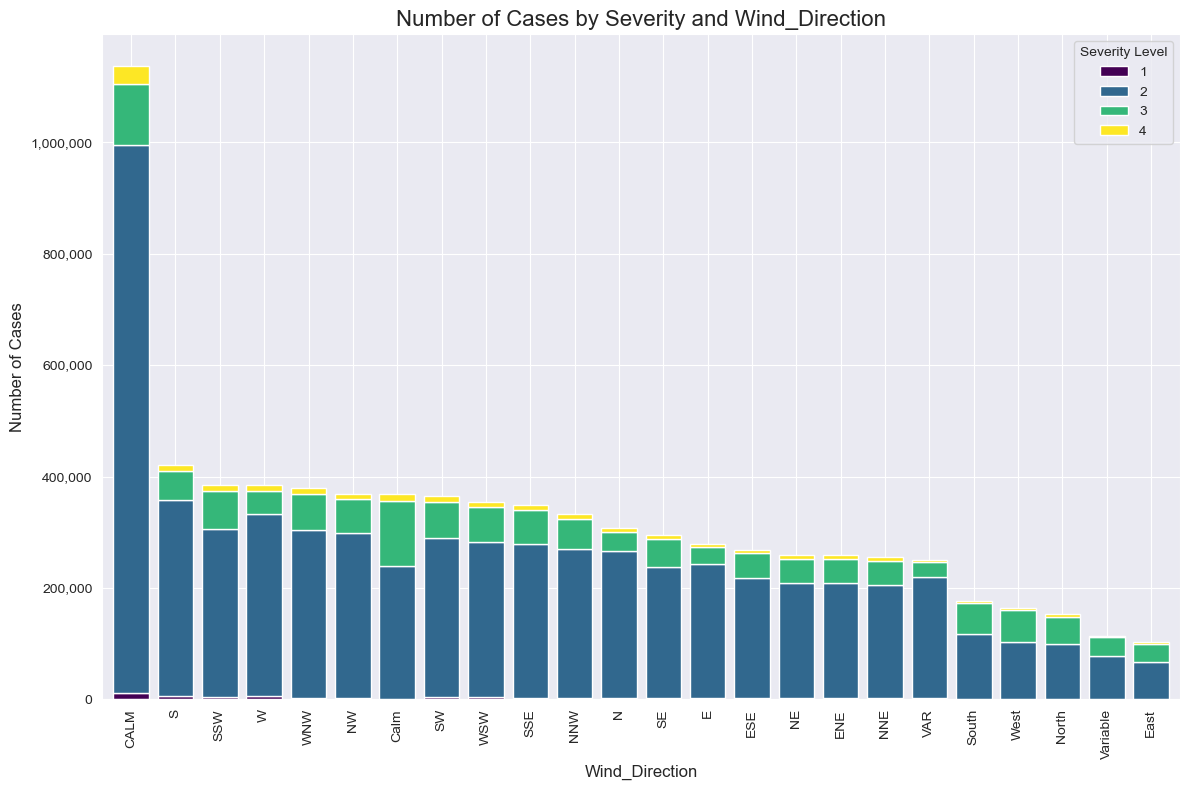

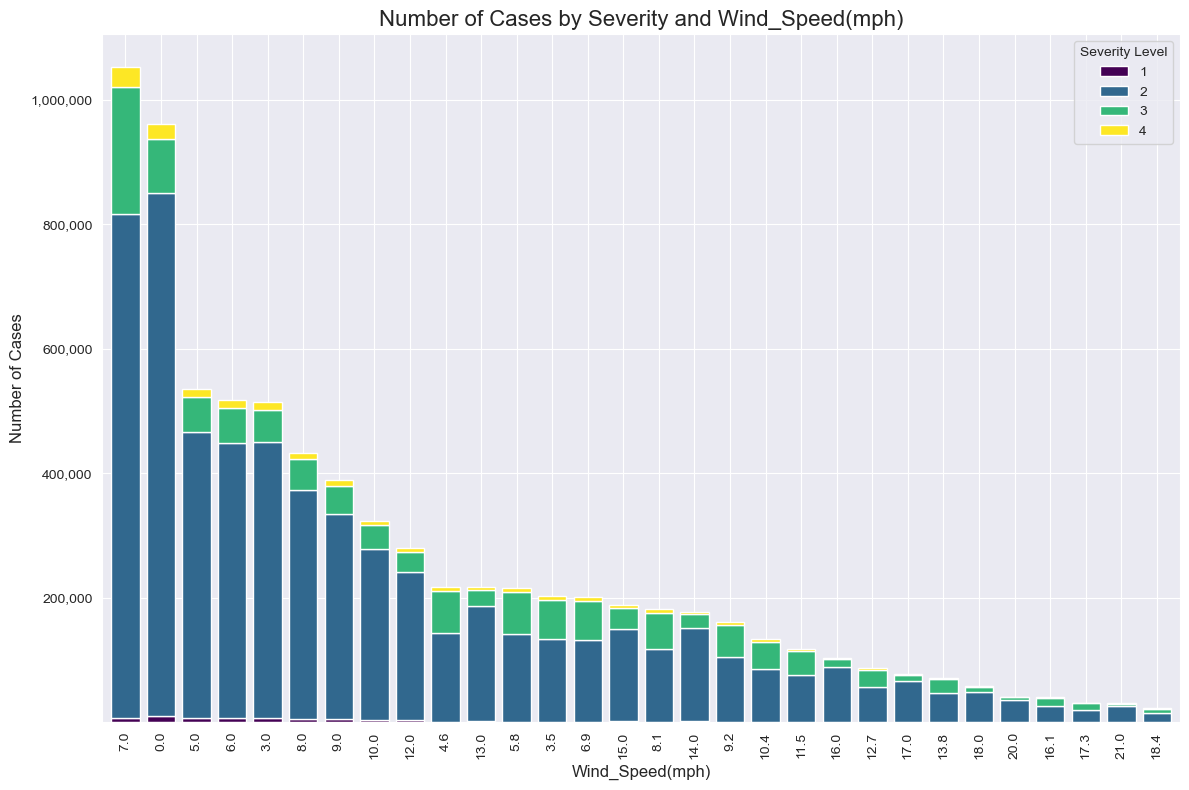

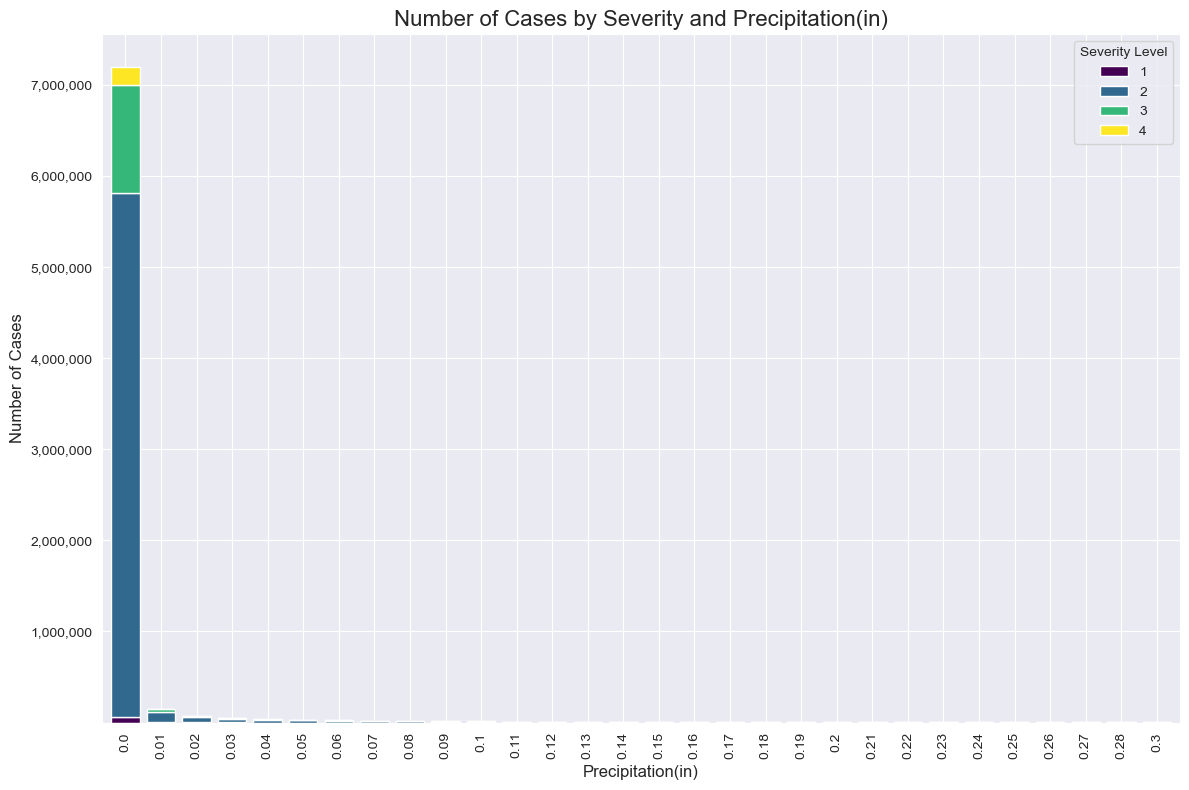

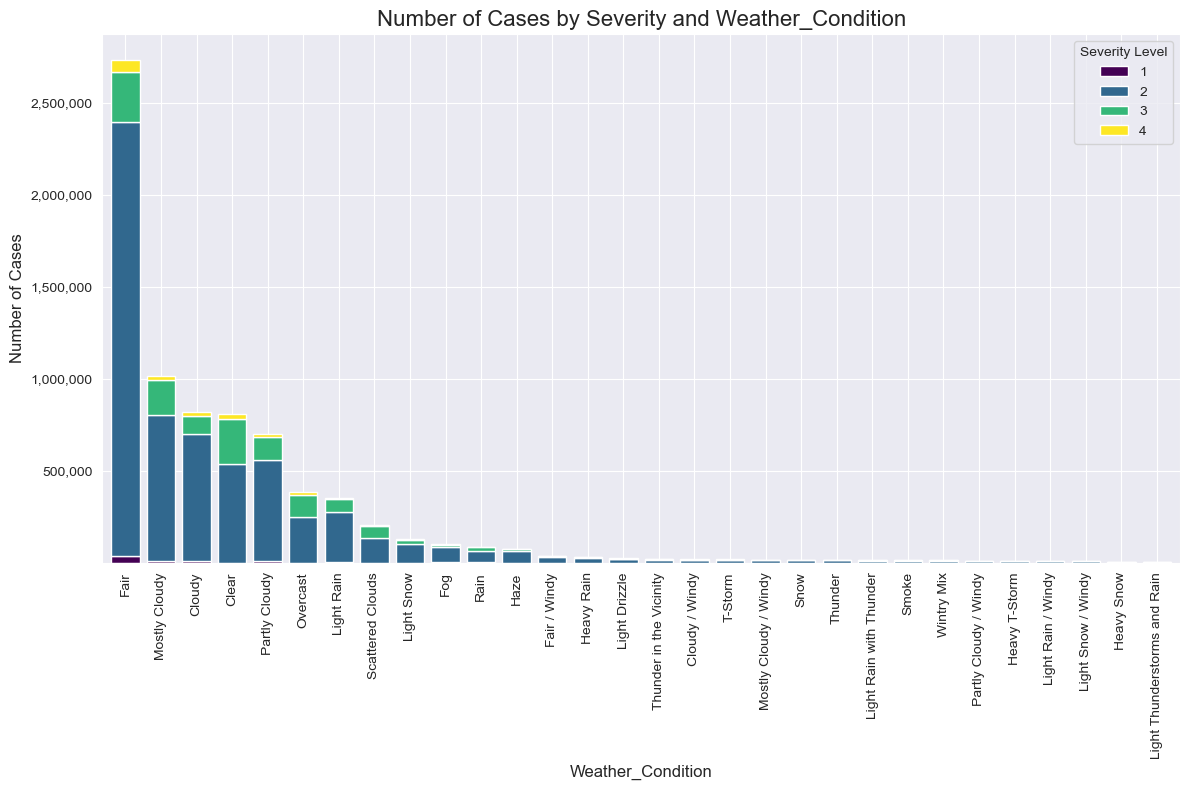

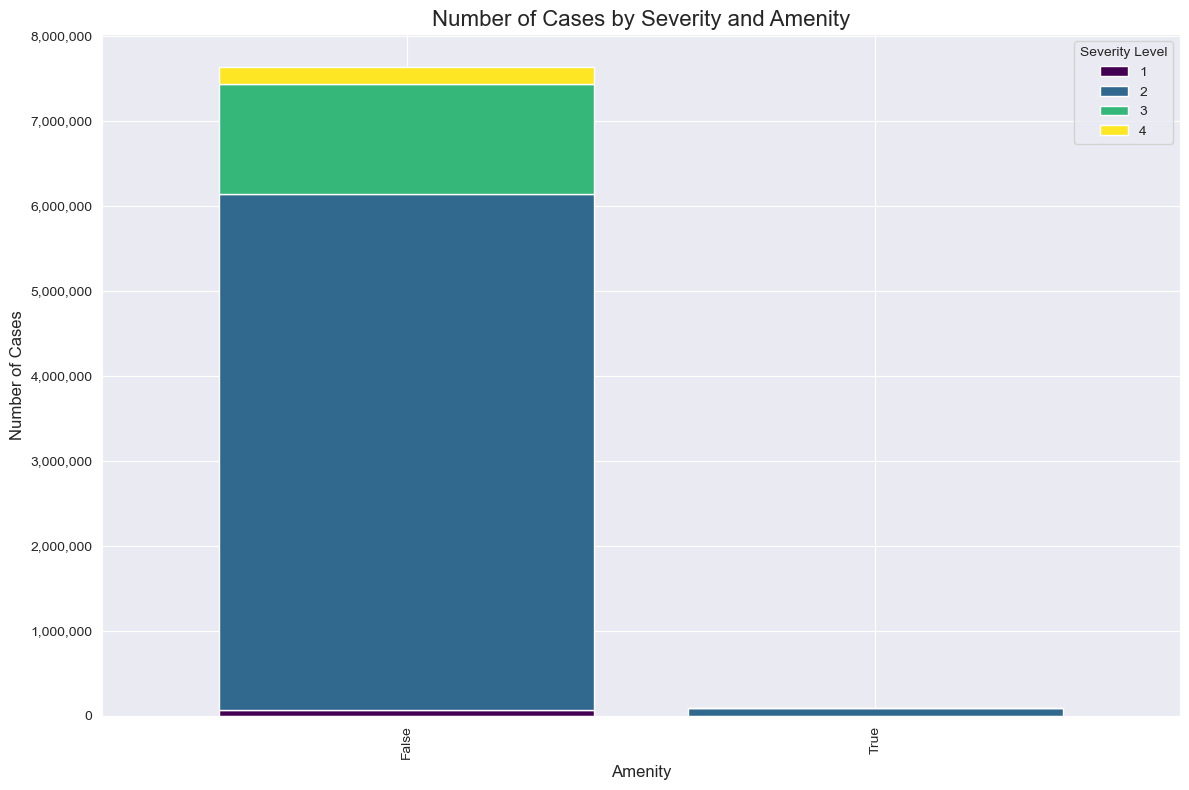

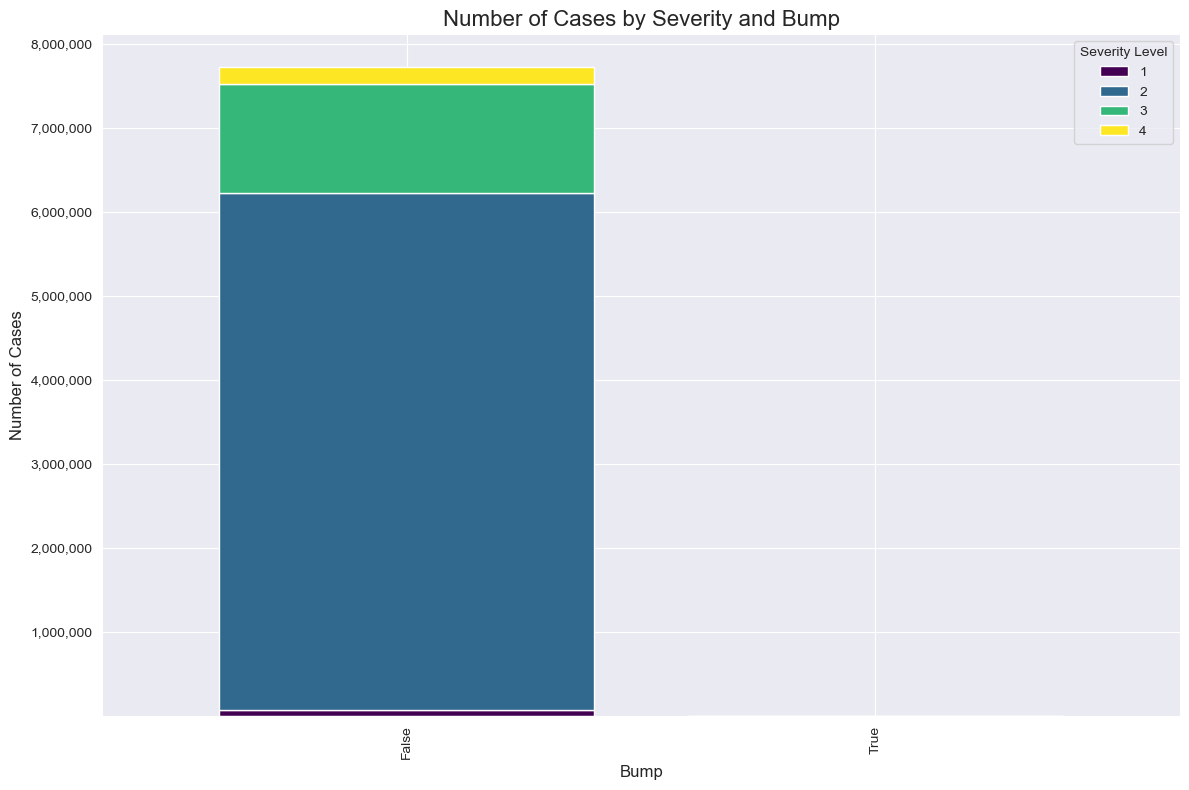

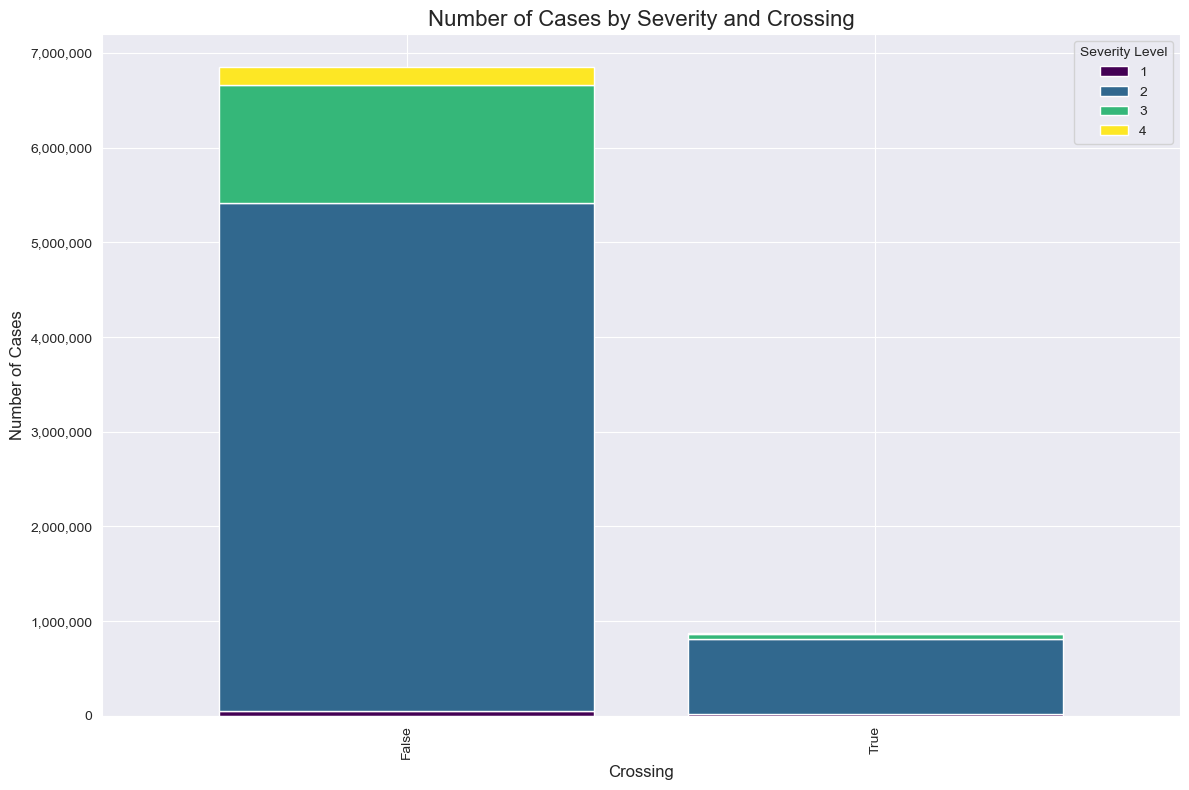

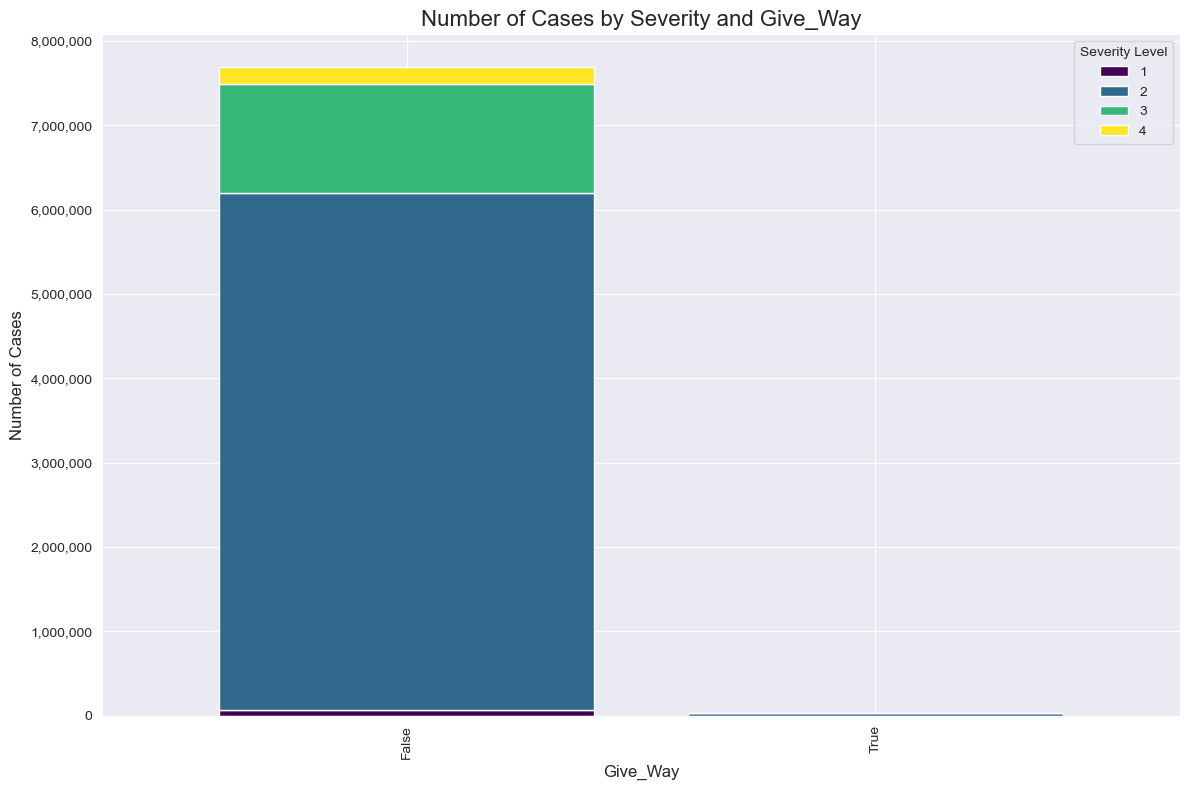

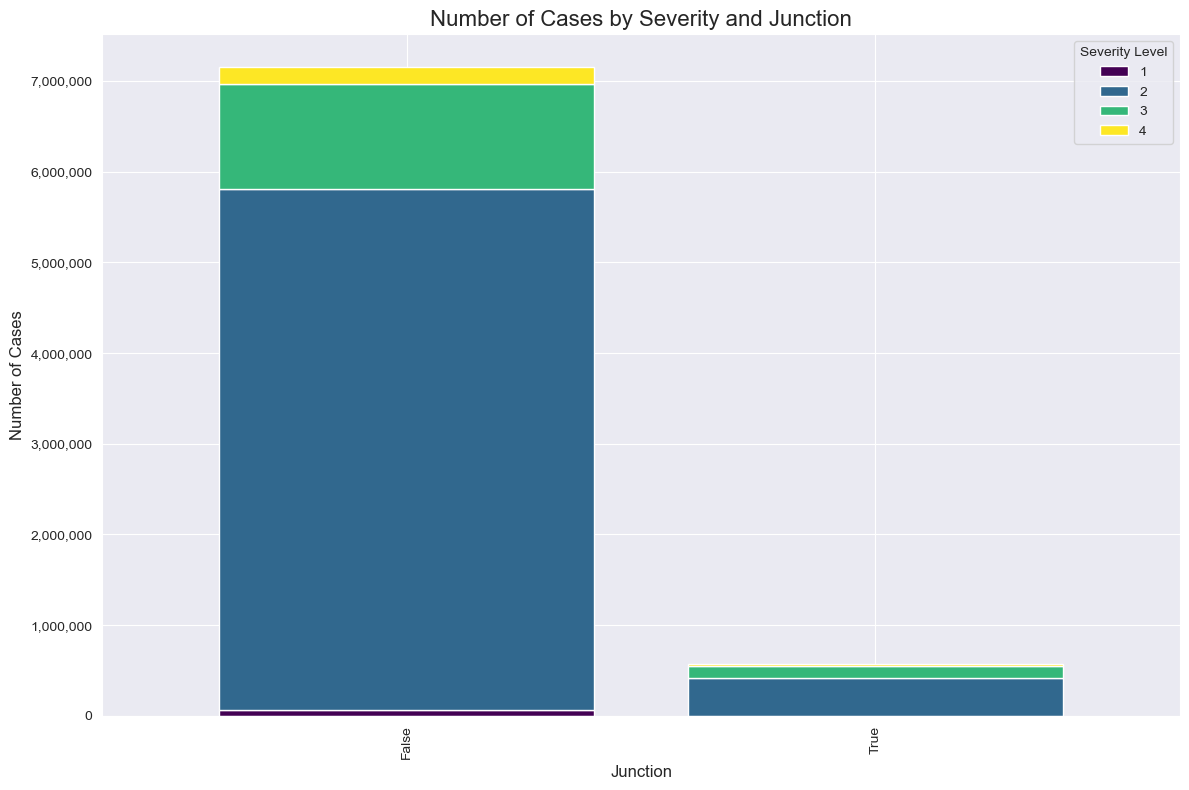

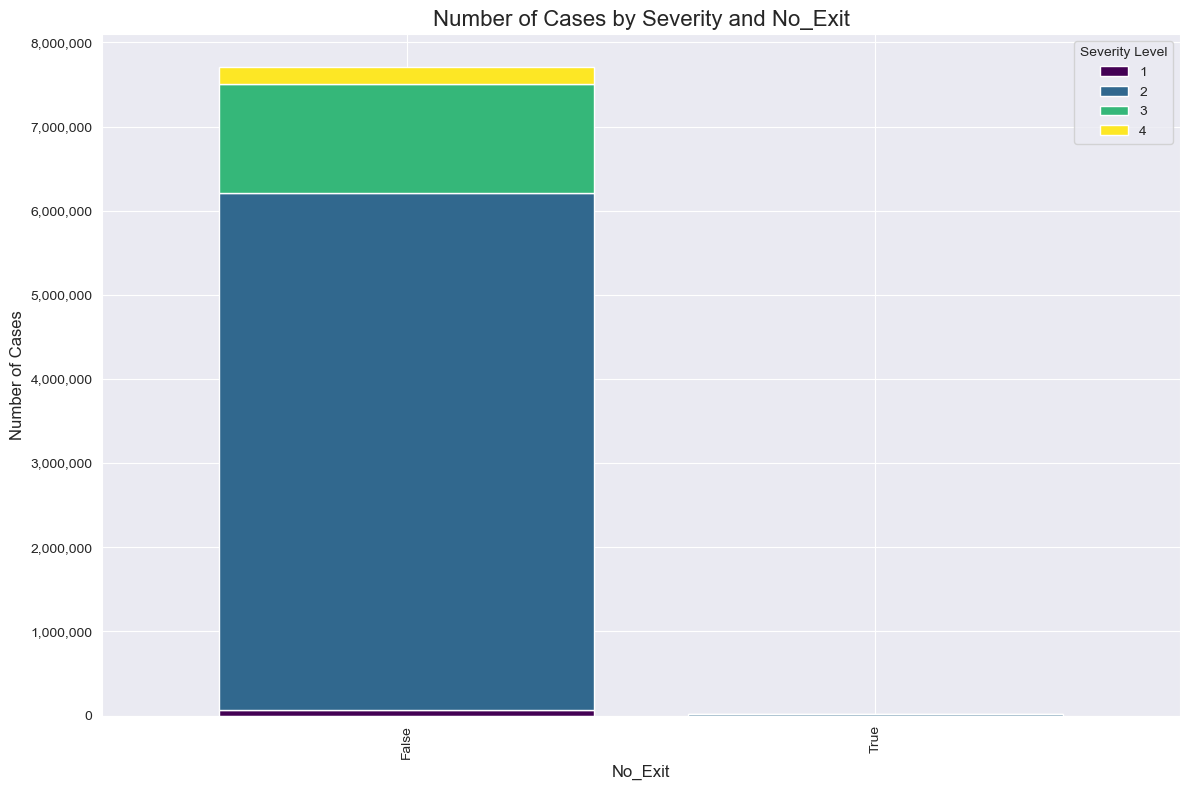

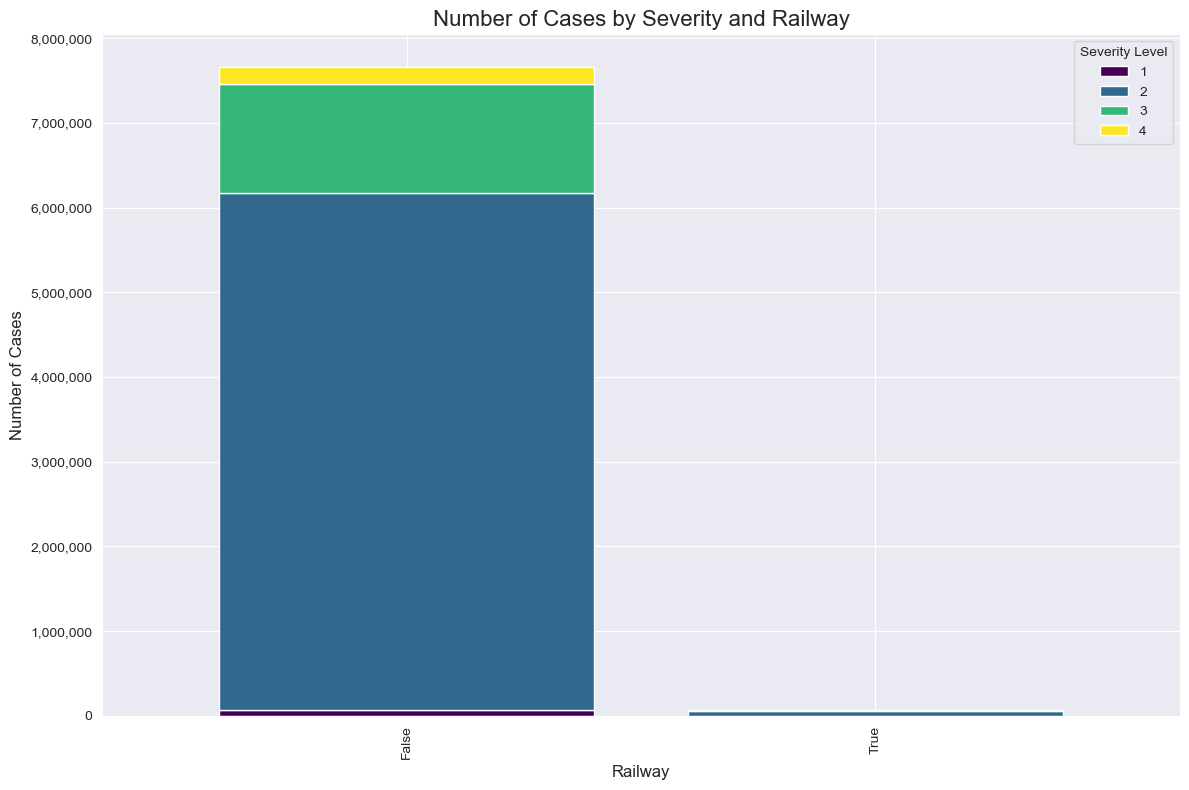

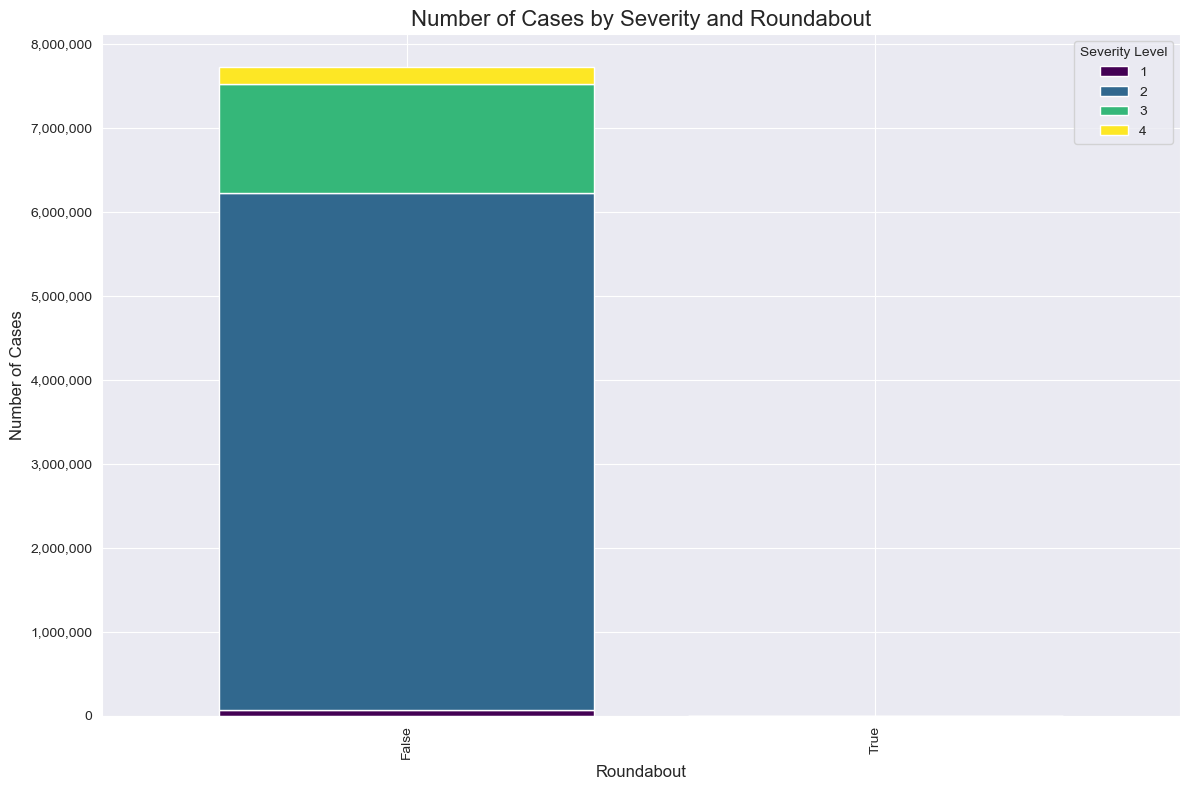

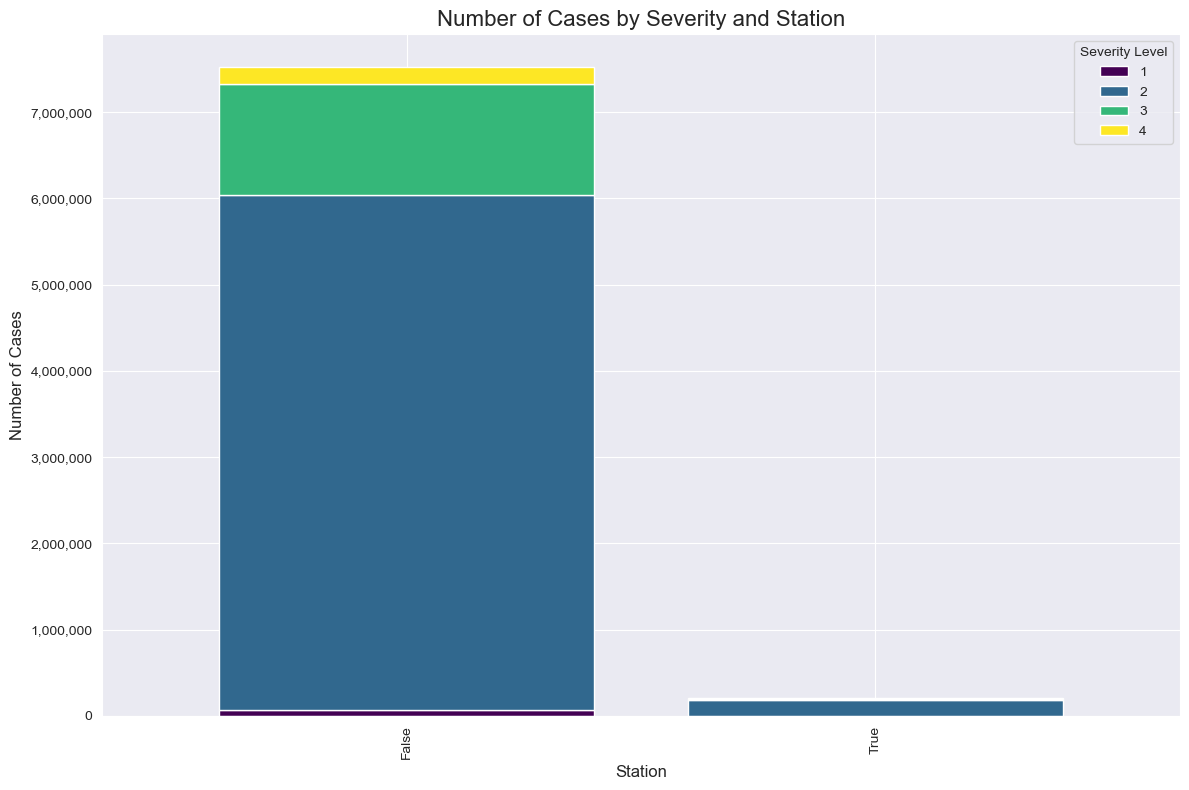

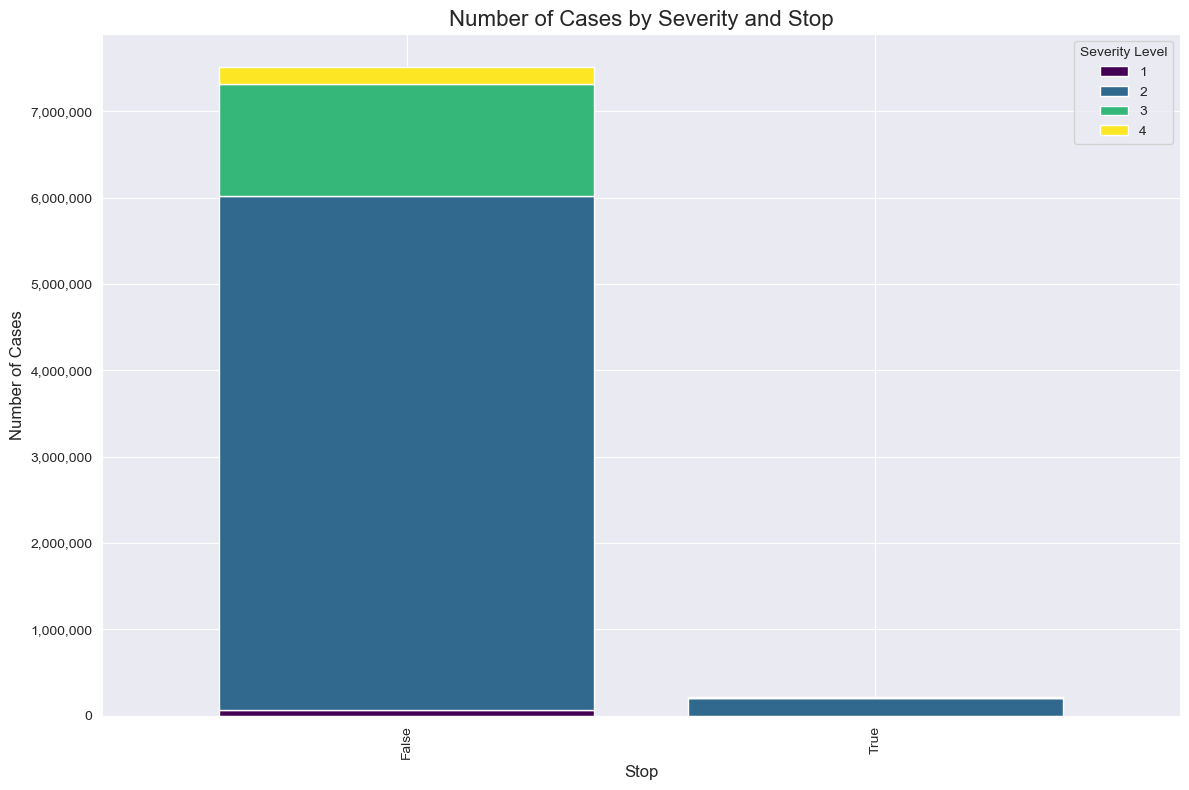

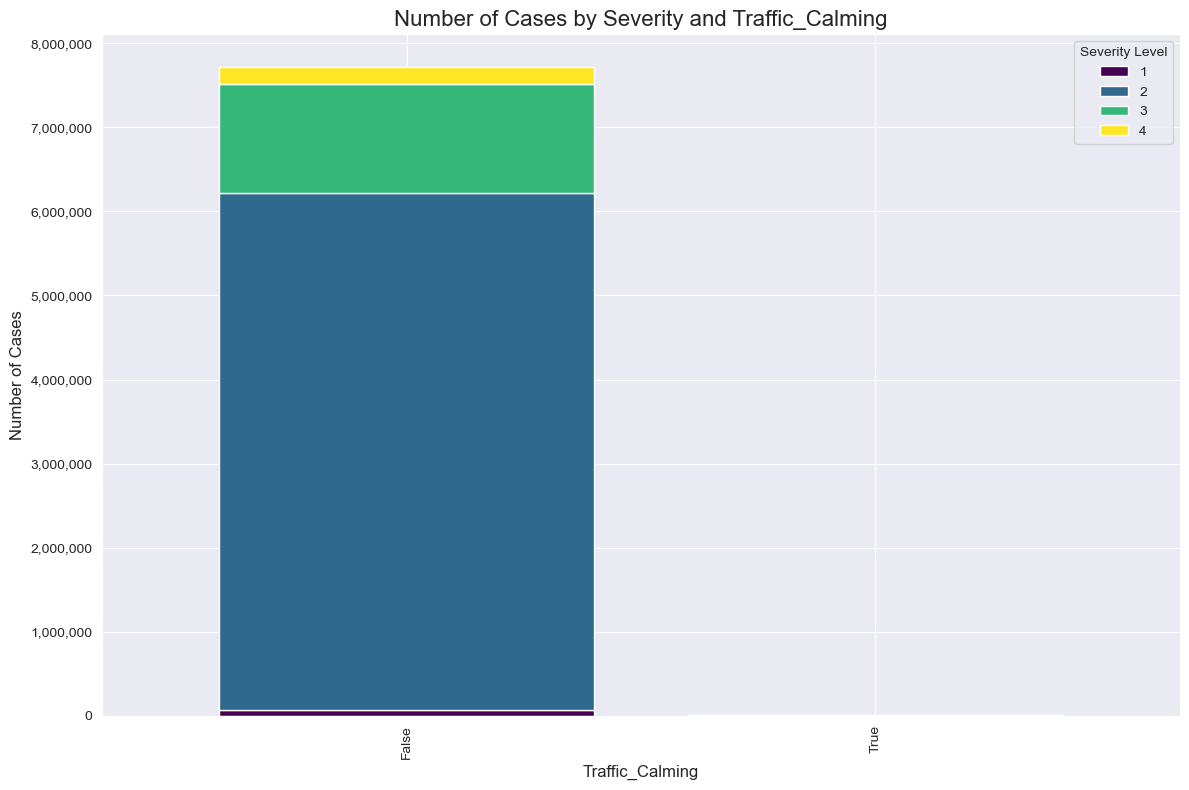

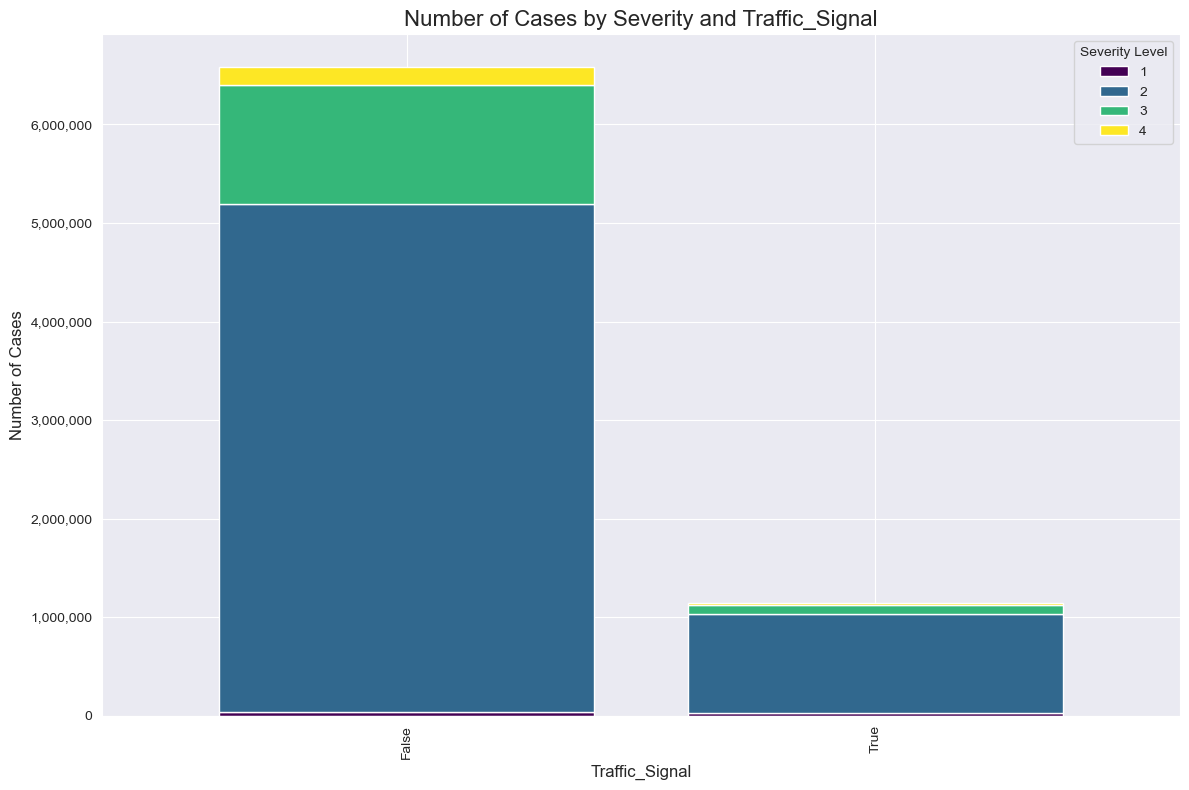

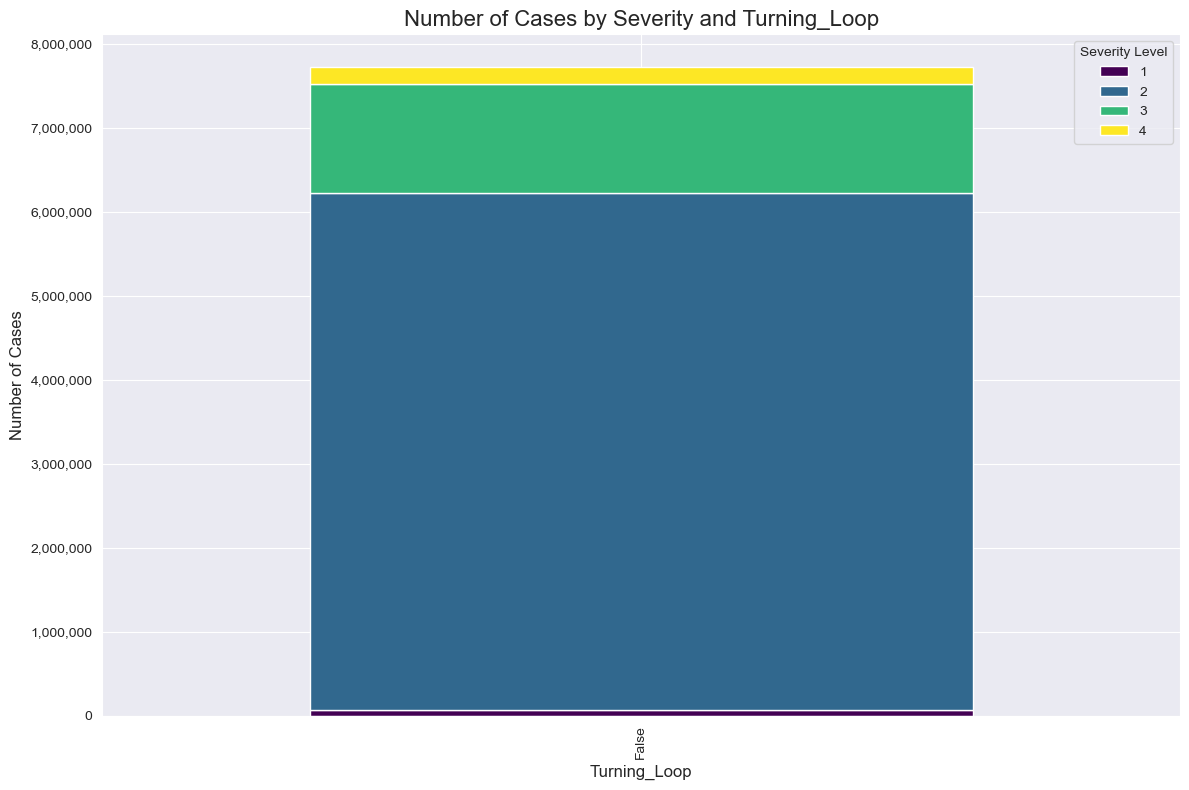

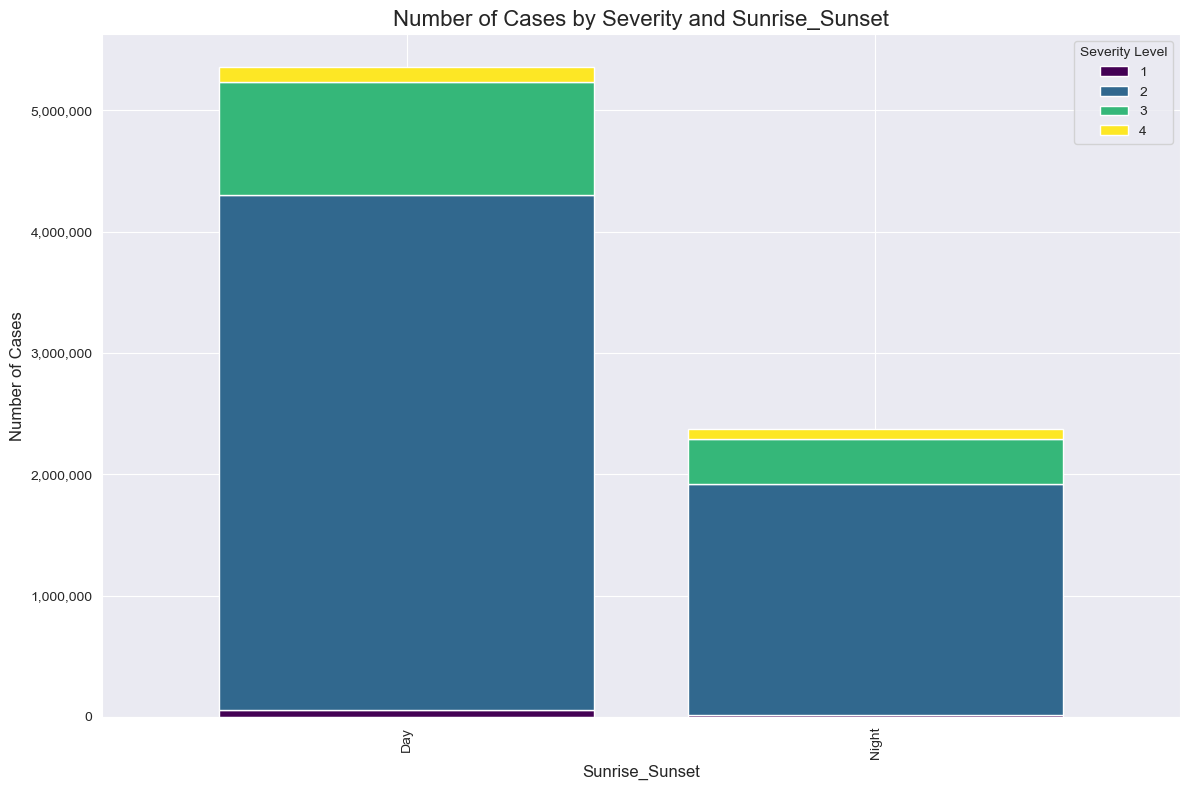

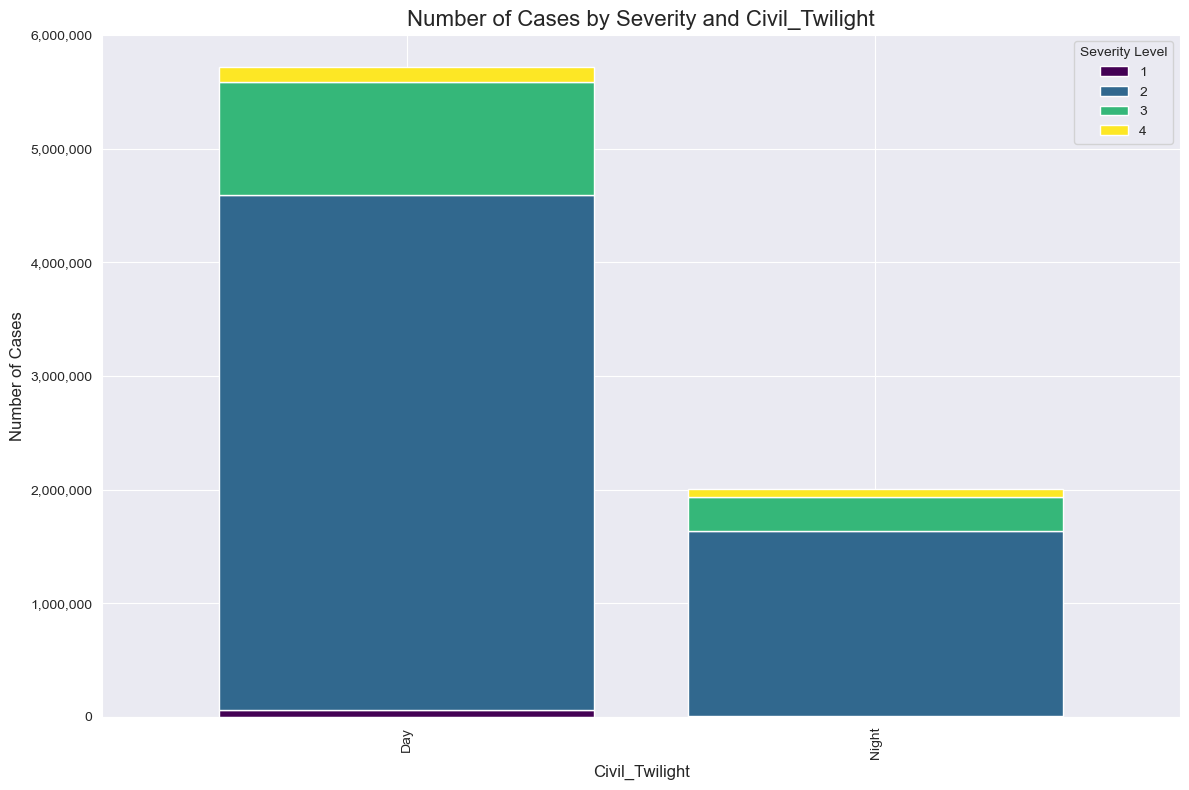

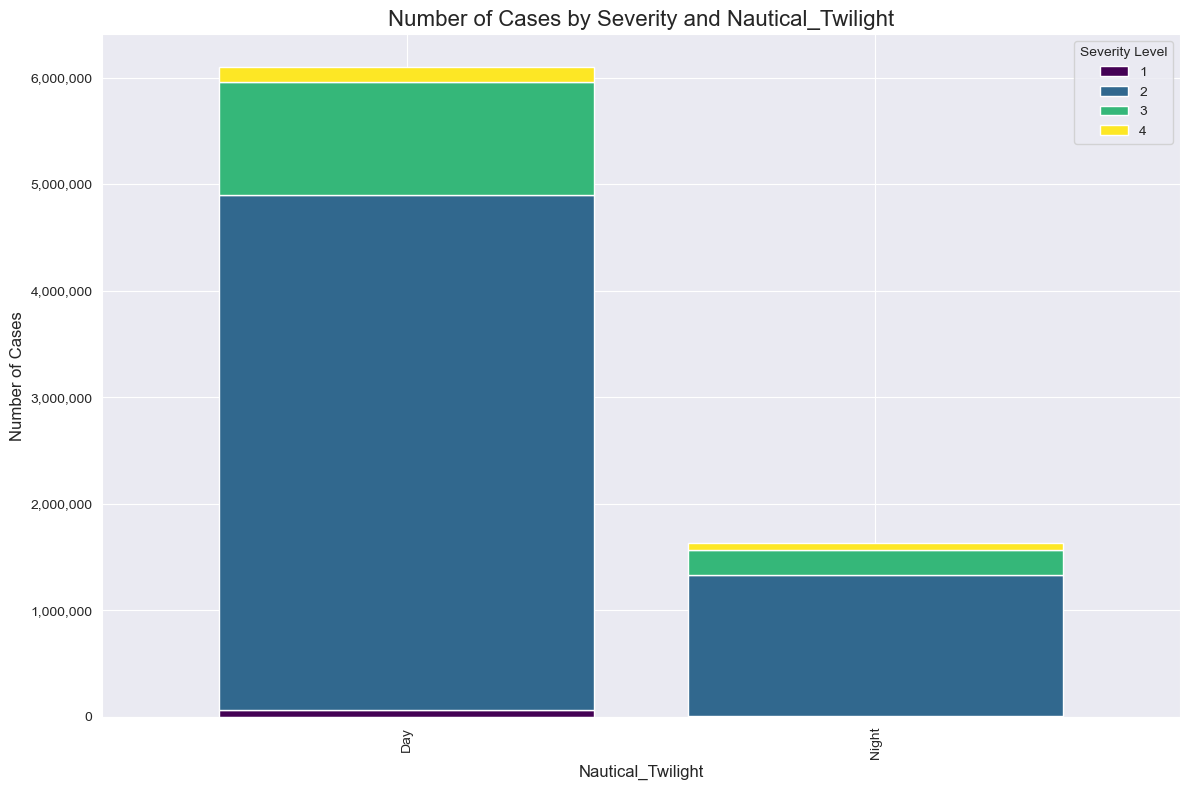

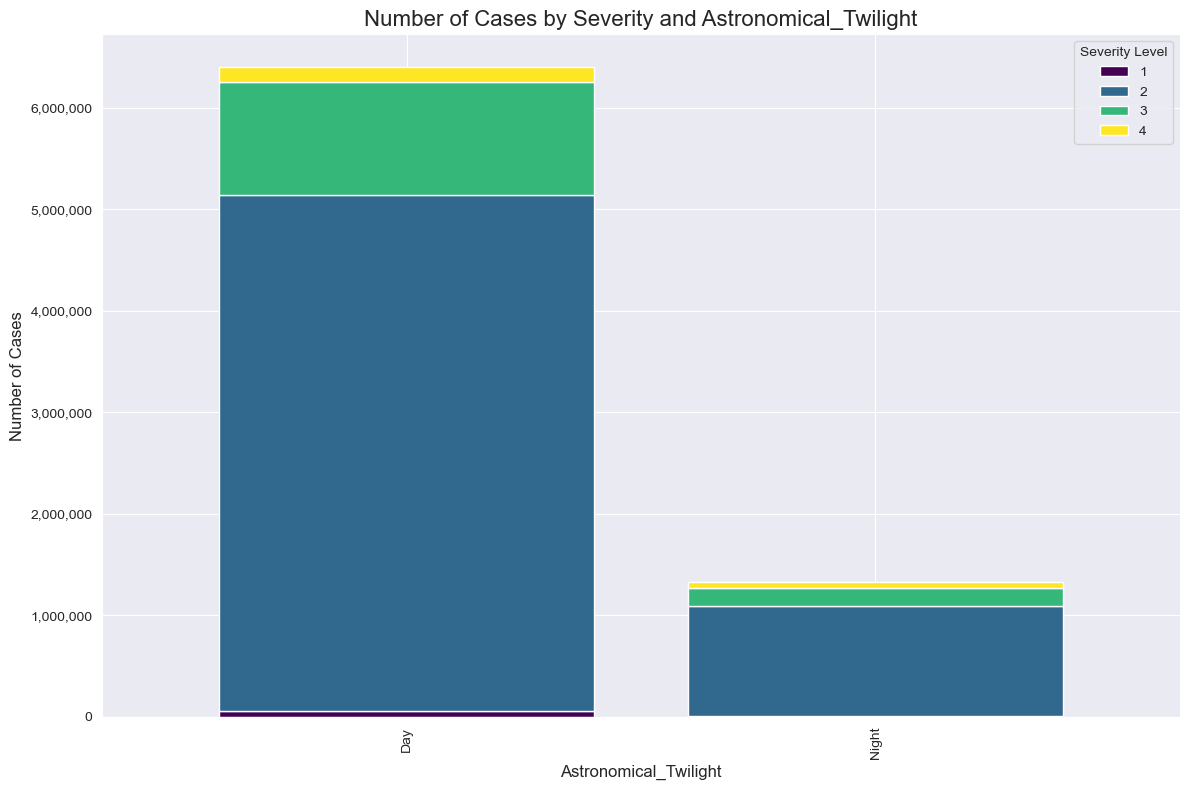

In [68]:
columns_to_plot = ['Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'] 

for column in columns_to_plot: plot_severity_distribution(df, group_by_column=column, top_n=30);

## Final Observations

1. The plots of the data shows that many accidents happened in areas where important road features like bumps, crossings, give-    ways, junctions, exits, traffic calming, and traffic signals were missing.

2. This could be a major reason for the high number of incidents, especially in cities like Los Angeles and states like            California and Texas, which report a lot of accidents. 

3. The lack of these safety features, such as traffic signals and traffic calming, might be making the roads more dangerous. 

4. To reduce accidents, it’s important for authorities to improve road infrastructure by adding these missing elements. This        could help lower the number of accidents and make the roads safer for everyone.

5. Most incidents happen on weekdays and during busy commute hours: A large number of accidents are occurring on working days,      especially during peak hours when people are traveling to and from work. This suggests that heavy traffic and congestion        during these times are likely contributing to the higher number of incidents. Improving traffic management and road safety      during these rush hours could help reduce accidents.

6. The number of incidents is rising each year: We can see an increase in incidents over the years, which is concerning. This      points to the fact that despite efforts to improve road safety, the core issues might not be getting addressed properly. This    upward trend suggests that either infrastructure improvements are lacking, or existing measures aren’t being enforced            effectively. As I pointed out eariler that infrastructure absence had higher number cases. We can now confidently say that      this is the root issue.